<a href="https://colab.research.google.com/github/sayak-coding/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><center> Business Context, Problem Statement and Dataset Description

<b> <center><h1>Business Context</center>

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.


<b><center><h1> Problem Statement</center>

In this project, you are required to do


*   Exploratory Data Analysis
*   Understanding what type content is available in different countries

*   If Netflix has been increasingly focusing on TV rather than movies in recent years.
*   Clustering similar content by matching text-based features












<b> <center><h1>Dataset Description</center>

show_id - Unique ID for every Movie/TV Show

type - Identifier-A Movie or TV Show

title - Title of the movie/show


director - Director of the show

cast - Actors involved

Country - Country of production

date added - Date it was added on Netflix

release year - Actual release year of the show

rating - TV rating of the show

duration - Total duration in minutes or number of

listed in - seasons

Description - Genre

Description - The summary description


























# <center><b> Import Library 

In [ ]:
pip install xplotter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Data Analysis 
import pandas as pd # for data frame 
import numpy as np # for linear algebra 

#Data Visualization
import seaborn as sns # visualization of seaborn graph
import matplotlib.pyplot as plt # visualization using matplot library
import plotly.offline as py # visualization using plotly graph
import plotly.express as px 
import plotly.graph_objs as go # visualization of plotly graph on subplot
from plotly.subplots import make_subplots
  
# Xplotter
from xplotter.insights import *
from xplotter.formatter import format_spines

from collections import Counter


In [ ]:
# import google drive 

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import the csv file 

Netflix = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone project/ML - Unsupervised Capstone Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
Netflix.head() # showing the top 5 rows of the data files

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
Netflix.shape # check the shape of the data file 

(7787, 12)

In [ ]:
Netflix.info() # check the data type of the columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# <center><b> Dealing with Null Values 

In [ ]:
#total count and percentage of missing data
count=0 # initialization of null values with zero. i.e. at first we select there is no nan values in the particular column 
for i in Netflix.isnull().sum(axis=1): # create a for loop which check nan values of every coloumn   
    if i>0: # if nan values greater than zero 
        count=count+1 # then nan values equlas to previous nan values + 1 
print('Total number of rows with missing values is ', count,'i.e. it is only',
      round((count/len(Netflix.index))*100), 'percent of the entire dataset') # print the total count of nan values and total % of nan values

Total number of rows with missing values is  2979 i.e. it is only 38 percent of the entire dataset


In [ ]:
missing = pd.concat([Netflix.isnull().sum()], axis=1, keys=["Total"]) # creating a data frame with the nan values 
print(missing) # print the all columns and the total null values present that column 
missing_columns = missing.loc[missing['Total']>0,:].sort_values(by=['Total'],ascending = False) # showing the only nan values column which is greater than zero 
missing_columns # show only that column which have null values 

              Total
show_id           0
type              0
title             0
director       2389
cast            718
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
description       0


Total
director     2389
cast          718
country       507
date_added     10
rating          7

In [ ]:
# Visualization of null values count
fig = px.bar(missing_columns, x=missing_columns.index, y=missing_columns['Total'],text_auto='.2s',
             title="Count of total null values") # plot the counts of the missing valus 
fig.show() # show the plot 

<b>We have null values on the column "dirctor", " cast", " country", " date added", "rating". 
Here we replaced null values by "unknown" , as the data type of the columns are  object type. So, we can replaced the nan values by the word "unknown".

In [ ]:
#replacement of null values
for i in missing_columns.axes[0].tolist(): # create a for loop which goes to every index of the missing columns 
    Netflix[i].fillna('Unknown',inplace=True) # and fill every nan values with "unknown".

In [ ]:
Netflix.isna().sum() # check the total nan values after replacement

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
Netflix.nunique() # check the unique values present in the columns

show_id         7787
type               2
title           7787
director        4050
cast            6832
country          682
date_added      1566
release_year      73
rating            15
duration         216
listed_in        492
description     7769
dtype: int64

In [ ]:
Netflix = Netflix.drop(['show_id'], axis=1) # here is no importance of the column "show_id" so , here i droped it

In [ ]:
_Netflix_ = Netflix.copy() # create a copy of the main data 

In [ ]:
# Dividing features into numerical and categgorical features 

col = list(_Netflix_.columns) # put the columns in a list 
categorical_features = [] # create a blank categorical column list 
numerical_features = [] # create a blank numerical column list
for i in col: # create a for loop which iterate every of the column list 
    if len(_Netflix_[i].unique())>5: # if values of a particular column is greater than 5 
        numerical_features.append(i) # then the particular column append to the numerical features category
    else:
        categorical_features.append(i) # or else it will append to the categorical features
print('Numerical Features :',*numerical_features) # print the numerical features list , * means, it will print only names of the column not in list form 
print('Categorical Features :',*categorical_features) # print the categorical features list

Numerical Features : title director cast country date_added release_year rating duration listed_in description
Categorical Features : type


Here only the column "type" is the categorical column and and other columns are numerical columns.  

# <b><center> Exploratory Data Analysis

# <b>How Many types of content present in Netflix?

In [ ]:
# Count the every types of the content and the counts of that content

content_category = _Netflix_['type'].value_counts().to_frame().reset_index().rename(columns={'index':'type', 'type':'count'})
content_category

type  count
0    Movie   5377
1  TV Show   2410

In [ ]:
colors = ["#8F00FF", "#FEDE00"] # set the colors for the visualization

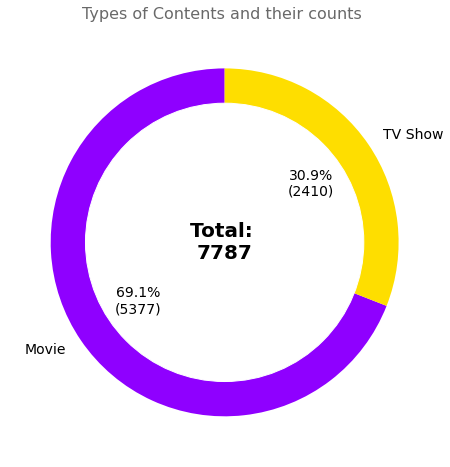

In [ ]:
# plot donut chart from xplotter 

plot_donut_chart(df=_Netflix_, col='type', colors=colors, title='Types of Contents and their counts ')

<b>We have two types of content, one is Movie and the other is TV Show. Out of 7787 contents 5377(i.e. 69.1% of total content) contents are Movies and 2410(i.e. 30.9% of total contents) contents are TV Shows.  

# <b> Release of Contents on the Year  

In [ ]:
# how many contents released in every year 

content_release_year = _Netflix_['release_year'].value_counts().to_frame().reset_index().rename(columns={'index':'release_year', 'release_year':'count'})
content_release_year

release_year  count
0           2018   1121
1           2017   1012
2           2019    996
3           2016    882
4           2020    868
..           ...    ...
68          1925      1
69          1964      1
70          1966      1
71          1947      1
72          1959      1

[73 rows x 2 columns]

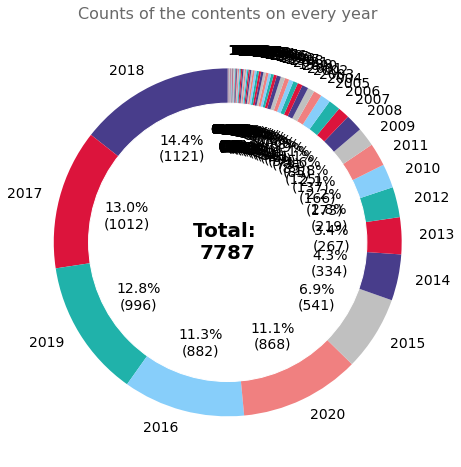

In [ ]:
# visualization

plot_donut_chart(df=_Netflix_, col='release_year', color_continuous_scale=["orange", "red","green","blue","purple"],
                 title='Counts of the contents on every year')

<b>Most contents released in the year 2018 (1121 contents, i.e. 14.4% of total contents) followed by the year 2017 ( 1012 contents, i.e. 13% of total contents)

# <b> Release of Contents on the Month

In [ ]:
_Netflix_["release_month"] = _Netflix_['date_added'].apply(lambda x: x.lstrip().split(" ")[0]) # Extract the month value from the 'date_added' column

In [ ]:
# how many contents released in every month 

content_release_month = _Netflix_['release_month'].value_counts().to_frame().reset_index().rename(columns={'index':'release_month', 'release_month':'count'})
content_release_month

release_month  count
0       December    833
1        October    785
2        January    757
3       November    738
4          March    669
5      September    619
6         August    618
7          April    601
8           July    600
9            May    543
10          June    542
11      February    472
12       Unknown     10

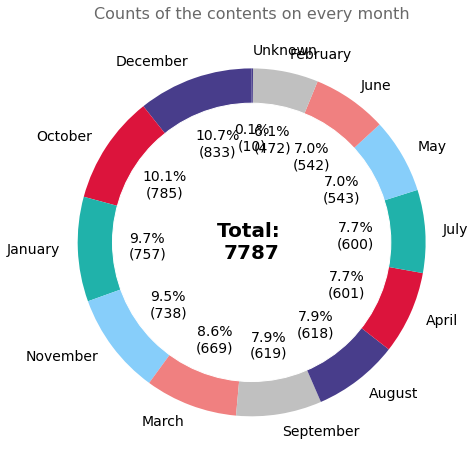

In [ ]:
# visualization

plot_donut_chart(df=_Netflix_, col='release_month', color_continuous_scale=["orange", "red","green","blue","purple"],
                 title='Counts of the contents on every month')

<b>Most contents released in the month December , total 833 number of contents i.e. 10.7% contents relesaed in that month. 
Less contents released in the month February, total 472 number of contents i.e. 6% contents released in that month.  

# <b> Count of the contents on the basis of Ratings  

In [ ]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
_Netflix_['Age_Group'] = _Netflix_['rating'].replace(ratings) # create a separate column 'Age_Group' 

In [ ]:
df_rating = _Netflix_.groupby(by=["rating", "Age_Group"]).size().reset_index(name="counts")
df_rating # create a dataframe grouping by the columns ratings and age group  

rating   Age_Group  counts
0          G        Kids      39
1      NC-17      Adults       3
2         NR      Adults      84
3         PG  Older Kids     247
4      PG-13       Teens     386
5          R      Adults     665
6      TV-14       Teens    1931
7       TV-G        Kids     194
8      TV-MA      Adults    2863
9      TV-PG  Older Kids     806
10      TV-Y        Kids     280
11     TV-Y7  Older Kids     271
12  TV-Y7-FV  Older Kids       6
13        UR      Adults       5
14   Unknown     Unknown       7

In [ ]:
# visualization of the data by plotly 

fig = px.bar(df_rating,x='rating', y = 'counts' ,text_auto='.2s',color="Age_Group", 
            title="Count of the contents on the basis of Ratings")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

<b>From anlysis of rating wise contents, we can say that maximum number of contents are TV-MA i.e. Adult types of contents.

# <b> Count of Movies on the basis of Ratings 

In [ ]:
movies = pd.DataFrame(_Netflix_.loc[_Netflix_['type'] == 'Movie']) # create a separate dataframe for the type ' movie' 
movies.head()

type  title           director  \
1  Movie   7:19  Jorge Michel Grau   
2  Movie  23:59       Gilbert Chan   
3  Movie      9        Shane Acker   
4  Movie     21     Robert Luketic   
6  Movie    122    Yasir Al Yasiri   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   

          date_added  release_year rating duration  \
1  December 23, 2016          2016  TV-MA   93 min   
2  December 20, 2018          2011      R   78 min   
3  November 16, 2017          2009  PG-13   80 min   
4    January 1, 2020          2008  PG-13  123 min   
6       June 1, 2020          2019  TV-MA   95 min   

                                           listed_in  \
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   
6                Horror Movies, International Movies   

                                         description release_month Age_Group  
1  After a devastating earthquake hits Mexico Cit...      December    Adults  
2  When an army recruit is found dead, his fellow...      December    Adults  
3  In a postapocalyptic world, rag-doll robots hi...      November     Teens  
4  A brilliant group of students become card-coun...       January     Teens  
6  After an awful accident, a couple admitted to ...          June    Adults

In [ ]:
df_rating_movie = movies.groupby(by=["rating", "Age_Group"]).size().reset_index(name="counts")
df_rating_movie # create a dataframe grouping by the columns ratings and age group 

rating   Age_Group  counts
0          G        Kids      39
1      NC-17      Adults       3
2         NR      Adults      79
3         PG  Older Kids     247
4      PG-13       Teens     386
5          R      Adults     663
6      TV-14       Teens    1272
7       TV-G        Kids     111
8      TV-MA      Adults    1845
9      TV-PG  Older Kids     505
10      TV-Y        Kids     117
11     TV-Y7  Older Kids      95
12  TV-Y7-FV  Older Kids       5
13        UR      Adults       5
14   Unknown     Unknown       5

In [ ]:
# Visualization

fig = px.histogram(movies, x = 'rating', hover_data = ['Age_Group'],text_auto='.2s',color="Age_Group", title="Count of the Movies on the basis of Ratings")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

<b>Out of 5377 movies around 2500 movies are adults type and 1700 movies are for teens. 

# <b> Count of TV Shows on the basis of Ratings

In [ ]:
tv_shows = pd.DataFrame(_Netflix_.loc[_Netflix_['type'] == 'TV Show']) # create a separate dataframe for the type ' tv show' 
tv_shows.head()

type   title              director  \
0   TV Show      3%               Unknown   
5   TV Show      46           Serdar Akar   
11  TV Show    1983               Unknown   
12  TV Show    1994  Diego Enrique Osorno   
16  TV Show  Feb-09               Unknown   

                                                 cast                country  \
0   João Miguel, Bianca Comparato, Michel Gomes, R...                 Brazil   
5   Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...                 Turkey   
11  Robert Więckiewicz, Maciej Musiał, Michalina O...  Poland, United States   
12                                            Unknown                 Mexico   
16  Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...                Unknown   

           date_added  release_year rating   duration  \
0     August 14, 2020          2020  TV-MA  4 Seasons   
5        July 1, 2017          2016  TV-MA   1 Season   
11  November 30, 2018          2018  TV-MA   1 Season   
12       May 17, 2019          2019  TV-MA   1 Season   
16     March 20, 2019          2018  TV-14   1 Season   

                                            listed_in  \
0   International TV Shows, TV Dramas, TV Sci-Fi &...   
5     International TV Shows, TV Dramas, TV Mysteries   
11  Crime TV Shows, International TV Shows, TV Dramas   
12  Crime TV Shows, Docuseries, International TV S...   
16                  International TV Shows, TV Dramas   

                                          description release_month Age_Group  
0   In a future where the elite inhabit an island ...        August    Adults  
5   A genetics professor experiments with a treatm...          July    Adults  
11  In this dark alt-history thriller, a naïve law...      November    Adults  
12  Archival video and new interviews examine Mexi...           May    Adults  
16  As a psychology professor faces Alzheimer's, h...         March     Teens

In [ ]:
df_rating_tv_show = tv_shows.groupby(by=["rating", "Age_Group"]).size().reset_index(name="counts")
df_rating_tv_show # create a dataframe grouping by the columns ratings and age group 

rating   Age_Group  counts
0        NR      Adults       5
1         R      Adults       2
2     TV-14       Teens     659
3      TV-G        Kids      83
4     TV-MA      Adults    1018
5     TV-PG  Older Kids     301
6      TV-Y        Kids     163
7     TV-Y7  Older Kids     176
8  TV-Y7-FV  Older Kids       1
9   Unknown     Unknown       2

In [ ]:
# visualization

fig = px.histogram(tv_shows, x = 'rating', hover_data = ['Age_Group'],text_auto='.2s',color="Age_Group",title="Count of the TV Shows on the basis of Ratings")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

<b>Highest count of tv shows are types of adults. Out of 2410 around 1000 tv shows are adult kinds. 

# <b> Highest Content Provided Country

In [ ]:
_Netflix_['country'].value_counts().sort_values(ascending=False) # show the total content provided by the each country 

United States                                                   2555
India                                                            923
Unknown                                                          507
United Kingdom                                                   397
Japan                                                            226
                                                                ... 
Georgia                                                            1
Germany, Canada, United States                                     1
Ireland, South Africa                                              1
Canada, Germany                                                    1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

In [ ]:
_Netflix_['country_'] = _Netflix_['country'].apply(lambda x: x.split(",")[0]) # cretae a separete column eith the values of the column country 
country_order = _Netflix_['country_'].value_counts().index # count of number of countries
country_content = _Netflix_[['type', 'country_']].groupby('country_')['type'].value_counts().unstack().loc[country_order].reset_index().rename(columns={'index':'Country'})
# separate every type of content present in every country by unstack function
country_content.head(10)

type         Country   Movie  TV Show
0      United States  2100.0    783.0
1              India   883.0     73.0
2     United Kingdom   341.0    236.0
3            Unknown   230.0    277.0
4             Canada   175.0     84.0
5              Japan    75.0    162.0
6             France   137.0     59.0
7        South Korea    42.0    152.0
8              Spain   119.0     49.0
9             Mexico    79.0     44.0

In [ ]:
# plotly visualization for count of movies, country wise 
fig = px.bar(country_content, x="Country", y=["Movie"],text_auto='.2s' ,color='Country', title="count of total movies provided by each country", width = 2000, height = 1000)
fig.update_traces(textfont_size=12, textangle=90, textposition="outside", cliponaxis=False)
# plotly visualization for count of tv shows, country wise 
fig1 = px.bar(country_content, x="Country", y=['TV Show'],text_auto='.2s' ,color='Country', title="count of total tv shows provided by each country", width = 2000, height = 1000)
fig1.update_traces(textfont_size=12, textangle=90, textposition="outside", cliponaxis=False)
fig.show()
fig1.show()

<b> The top ten contents provided countries are "United States", "India"," United Kingdom" "Canada", " Japan", " France", "South Korea", "Spain", and "Mexico".

# <b> Contents of Top 10 Content Provider Country

In [ ]:
# Create subset by group by the columns country and listed in .
conuntry_and_genre = _Netflix_[['country', 'listed_in']]

# Create a function to seperate all genres and store counts for each.
def country_wise_genre(country):
  country_genre = conuntry_and_genre[conuntry_and_genre['country'] == country]
  country_genre = ", ".join(country_genre['listed_in'].dropna()).split(", ")
  country_genre_dict = dict(Counter(country_genre))
  return country_genre_dict

# Define list of top ten countries.
country_list = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia']
# Create an empty dict to store values of each genre for each country.
country_wise_genre_dict = {}
# Iterate through all values in country_list.
for i in country_list:
  genre_data = country_wise_genre(i)
  country_wise_genre_dict[i] = genre_data
  country_genre_count_df = pd.DataFrame(country_wise_genre_dict).reset_index()
  country_genre_count_df.rename({'index':'Genre'}, inplace=True, axis=1)

In [ ]:
country_genre_count_df # show the dataframe of country wise genre count

Genre  United States  India  United Kingdom  \
0             Action & Adventure            196  124.0            19.0   
1             Independent Movies            284  129.0            24.0   
2               Sci-Fi & Fantasy            101   10.0             6.0   
3                         Dramas            517  589.0            37.0   
4                      Thrillers            168   85.0            15.0   
5                  Documentaries            381   18.0            79.0   
6                     Reality TV            103    3.0            32.0   
7                    TV Comedies            219   25.0            37.0   
8                       Comedies            458  293.0            31.0   
9                  Sports Movies             82   15.0            13.0   
10               Romantic Movies            147  111.0             3.0   
11                    Docuseries            163    7.0            79.0   
12           Science & Nature TV             38    NaN            21.0   
13                        Movies             22    NaN             2.0   
14                 Horror Movies            126   31.0             9.0   
15                Crime TV Shows            105    8.0            36.0   
16                     TV Dramas            181   24.0            21.0   
17                  TV Mysteries             37    3.0             1.0   
18              Music & Musicals            100   90.0            13.0   
19                  LGBTQ Movies             52    2.0             3.0   
20                      Kids' TV            132   10.0            18.0   
21         TV Action & Adventure             67    5.0             3.0   
22           TV Sci-Fi & Fantasy             42    3.0             1.0   
23              British TV Shows              4    1.0           187.0   
24      Children & Family Movies            252   16.0             7.0   
25                      TV Shows              3    2.0             NaN   
26  Stand-Up Comedy & Talk Shows             33    3.0             1.0   
27                   Cult Movies             32    5.0             3.0   
28        International TV Shows             26   59.0           102.0   
29               Stand-Up Comedy            211    6.0            20.0   
30          International Movies             17  785.0            61.0   
31                Classic Movies             53   11.0             3.0   
32                 Teen TV Shows             29    1.0             NaN   
33                     TV Horror             27    7.0             1.0   
34                  TV Thrillers             21    3.0             1.0   
35          Faith & Spirituality             28    3.0             NaN   
36             Classic & Cult TV             14    NaN             6.0   
37             Romantic TV Shows             33    9.0             9.0   
38                  Anime Series              5    NaN             NaN   
39     Spanish-Language TV Shows             12    NaN             NaN   
40               Korean TV Shows              1    NaN             NaN   
41                Anime Features              1    NaN             NaN   

    Canada  Japan  France  South Korea  Spain  Mexico  Australia  
0     12.0   42.0    12.0         13.0    3.0     2.0        3.0  
1     15.0    NaN     8.0          NaN   11.0    12.0        4.0  
2      5.0    7.0     1.0          3.0    2.0     2.0        2.0  
3     21.0    9.0    29.0         18.0   35.0    22.0       16.0  
4     11.0    1.0     3.0         12.0   18.0     1.0        4.0  
5     20.0    NaN    22.0          1.0   16.0    10.0        5.0  
6      9.0    6.0     2.0          3.0    2.0     NaN       11.0  
7     14.0    6.0    14.0         13.0    5.0     3.0       13.0  
8     38.0    NaN    17.0          5.0   31.0    16.0        5.0  
9      6.0    NaN     7.0          NaN    3.0     1.0        4.0  
10    15.0    3.0     4.0          1.0    9.0     6.0        NaN  
11     8.0    1.0     5.0          NaN  

In [ ]:
country_genre_count_df.fillna(value=0) # fill the null values with zeros

Genre  United States  India  United Kingdom  \
0             Action & Adventure            196  124.0            19.0   
1             Independent Movies            284  129.0            24.0   
2               Sci-Fi & Fantasy            101   10.0             6.0   
3                         Dramas            517  589.0            37.0   
4                      Thrillers            168   85.0            15.0   
5                  Documentaries            381   18.0            79.0   
6                     Reality TV            103    3.0            32.0   
7                    TV Comedies            219   25.0            37.0   
8                       Comedies            458  293.0            31.0   
9                  Sports Movies             82   15.0            13.0   
10               Romantic Movies            147  111.0             3.0   
11                    Docuseries            163    7.0            79.0   
12           Science & Nature TV             38    0.0            21.0   
13                        Movies             22    0.0             2.0   
14                 Horror Movies            126   31.0             9.0   
15                Crime TV Shows            105    8.0            36.0   
16                     TV Dramas            181   24.0            21.0   
17                  TV Mysteries             37    3.0             1.0   
18              Music & Musicals            100   90.0            13.0   
19                  LGBTQ Movies             52    2.0             3.0   
20                      Kids' TV            132   10.0            18.0   
21         TV Action & Adventure             67    5.0             3.0   
22           TV Sci-Fi & Fantasy             42    3.0             1.0   
23              British TV Shows              4    1.0           187.0   
24      Children & Family Movies            252   16.0             7.0   
25                      TV Shows              3    2.0             0.0   
26  Stand-Up Comedy & Talk Shows             33    3.0             1.0   
27                   Cult Movies             32    5.0             3.0   
28        International TV Shows             26   59.0           102.0   
29               Stand-Up Comedy            211    6.0            20.0   
30          International Movies             17  785.0            61.0   
31                Classic Movies             53   11.0             3.0   
32                 Teen TV Shows             29    1.0             0.0   
33                     TV Horror             27    7.0             1.0   
34                  TV Thrillers             21    3.0             1.0   
35          Faith & Spirituality             28    3.0             0.0   
36             Classic & Cult TV             14    0.0             6.0   
37             Romantic TV Shows             33    9.0             9.0   
38                  Anime Series              5    0.0             0.0   
39     Spanish-Language TV Shows             12    0.0             0.0   
40               Korean TV Shows              1    0.0             0.0   
41                Anime Features              1    0.0             0.0   

    Canada  Japan  France  South Korea  Spain  Mexico  Australia  
0     12.0   42.0    12.0         13.0    3.0     2.0        3.0  
1     15.0    0.0     8.0          0.0   11.0    12.0        4.0  
2      5.0    7.0     1.0          3.0    2.0     2.0        2.0  
3     21.0    9.0    29.0         18.0   35.0    22.0       16.0  
4     11.0    1.0     3.0         12.0   18.0     1.0        4.0  
5     20.0    0.0    22.0          1.0   16.0    10.0        5.0  
6      9.0    6.0     2.0          3.0    2.0     0.0       11.0  
7     14.0    6.0    14.0         13.0    5.0     3.0       13.0  
8     38.0    0.0    17.0          5.0   31.0    16.0        5.0  
9      6.0    0.0     7.0          0.0    3.0     1.0        4.0  
10    15.0    3.0     4.0          1.0    9.0     6.0        0.0  
11     8.0    1.0     5.0          0.0  

In [ ]:
# Create specification of plot type
specification = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
# make subplots
fig = make_subplots(rows=2, cols=5, specs=specification, subplot_titles=['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia'])
# Define traces.
fig.add_trace(go.Pie(labels=country_genre_count_df['Genre'], values=country_genre_count_df['United States'], name='United States'),1,1)
fig.add_trace(go.Pie(labels=country_genre_count_df['Genre'], values=country_genre_count_df['India'],  name='India'),1,2)
fig.add_trace(go.Pie(labels=country_genre_count_df['Genre'], values=country_genre_count_df['United Kingdom'],  name='United Kingdom'),1,3)
fig.add_trace(go.Pie(labels=country_genre_count_df['Genre'], values=country_genre_count_df['Canada'],  name='Canada'),1,4)
fig.add_trace(go.Pie(labels=country_genre_count_df['Genre'], values=country_genre_count_df['Japan'],  name='Japan'),1,5)
fig.add_trace(go.Pie(labels=country_genre_count_df['Genre'], values=country_genre_count_df['France'],  name='France'),2,1)
fig.add_trace(go.Pie(labels=country_genre_count_df['Genre'], values=country_genre_count_df['South Korea'],  name='South Korea'),2,2)
fig.add_trace(go.Pie(labels=country_genre_count_df['Genre'], values=country_genre_count_df['Spain'],  name='Spain'),2,3)
fig.add_trace(go.Pie(labels=country_genre_count_df['Genre'], values=country_genre_count_df['Mexico'],  name='Mexico'),2,4)
fig.add_trace(go.Pie(labels=country_genre_count_df['Genre'], values=country_genre_count_df['Australia'],  name='Australia'),2,5)

# figure layout
colors = px.colors.named_colorscales()
fig.update_traces(hoverinfo='label+percent',textposition='inside', textfont_size=10, marker=dict(colors=colors))
fig.update_layout(title={'text': 'Top ten countries and the content they provide.',
                          'y':0.97,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'},height=1300, width=3100,paper_bgcolor='white',
                  legend=dict(x=0.099,orientation="h")
                          )
fig = go.Figure(fig)
fig.show()



 <b>The top 10 countries and their top 5 represent contents are - 
 1. United State  
*   Dramas - 11.4%
*   Comedies - 10.1%
*   Documentaries - 8.42%
*   Independent Movies - 6.28%
*   Children and Family Movies - 5.57%

 2. India 
*   International Movies - 31.5%
*   Dramas - 23.6%
*   Comedies - 11.7%
*   Independent Movies - 5.17%
*   Action and Adventure - 4.97%

 3. United Kingdom  
*   British TV Shows - 20.7%
*   International TV Shows - 11.3%
*   Documentaries - 8.74%
*   Docuseries - 8.74%
*   Internatinal Movies - 6.75% 

 4. Canada
*   Comedies - 11.2%
*   Children and Family Movies -8.55% 
*   International Movies - 7.37%
*   Dramas - 6.19%
*   DOcumentaries - 5.9%

 5. Japan
*   International Movies - 23.9%
*   Anime Series - 22.4%
*   Anime Features - 9.63%
*   International Movies - 8.89%
*   Action and Adventure - 7.78% 

 6. France
*   International Movies - 22%
*   International TV Shows - 10.5%
*   Dramas - 10.1%
*   Documentaries - 7.69%
*   TV Dramas - 6.64%

 7. South Korea
*   International Movies - 26.3%
*   Korean TV Shows - 24.8%
*   Romantic TV Shows - 13.7%
*   International Movies - 6.3%
*   TV Dramas - 5.34%

 8. Spain
*   International Movies - 23.3%
*   International TV Shows - 12.1%
*   Dramas - 9.83%
*   Spanish Language TV Shows - 9.55%
*   Comedies - 8.71%

 9. Mexico
*   International Movies - 18.8%
*   International TV Shows - 13.1%
*   Spanish Language TV SHows - 11.8%
*   Dramas - 8.98%
*   Crime TV Shows - 7.35%

 10. Australia
*   International TV Shows - 14.4%
*   Dramas - 8.89%
*   TV Dramas - 8.33%
*   TV Comedies - 7.22%
*   International Movies - 6.67%




# <b> Count of Content on the basis of Genre

In [ ]:
genre=list(_Netflix_['listed_in']) # create a list of all genre
genre_list=[] # create a blank list for unique genre
for i in genre: # on everyiteration of genre list
    i=list(i.split(',')) # split the lsit data
    for j in i:
        genre_list.append(j.replace(' ',"")) # and append to genre list  

In [ ]:
genre_list # show the genre list

['InternationalTVShows',
 'TVDramas',
 'TVSci-Fi&Fantasy',
 'Dramas',
 'InternationalMovies',
 'HorrorMovies',
 'InternationalMovies',
 'Action&Adventure',
 'IndependentMovies',
 'Sci-Fi&Fantasy',
 'Dramas',
 'InternationalTVShows',
 'TVDramas',
 'TVMysteries',
 'HorrorMovies',
 'InternationalMovies',
 'Dramas',
 'HorrorMovies',
 'InternationalMovies',
 'HorrorMovies',
 'InternationalMovies',
 'Thrillers',
 'Dramas',
 'Thrillers',
 'CrimeTVShows',
 'InternationalTVShows',
 'TVDramas',
 'CrimeTVShows',
 'Docuseries',
 'InternationalTVShows',
 'Documentaries',
 'InternationalMovies',
 'SportsMovies',
 'IndependentMovies',
 'Sci-Fi&Fantasy',
 'Thrillers',
 'Dramas',
 'InternationalMovies',
 'Thrillers',
 'InternationalTVShows',
 'TVDramas',
 'Dramas',
 'Thrillers',
 'Comedies',
 'Dramas',
 'IndependentMovies',
 'SportsMovies',
 'Dramas',
 'IndependentMovies',
 'InternationalMovies',
 'Action&Adventure',
 'Dramas',
 'InternationalMovies',
 'Dramas',
 'InternationalMovies',
 'Dramas',
 'Int

In [ ]:
Counts = Counter(genre_list) # using dictionary subclass Counter to count objects 
genre_list = sorted(Counts, key = Counts.get, reverse = True) # sort the genre list according to the counts
print(genre_list) # show the genre list

['InternationalMovies', 'Dramas', 'Comedies', 'InternationalTVShows', 'Documentaries', 'Action&Adventure', 'TVDramas', 'IndependentMovies', 'Children&FamilyMovies', 'RomanticMovies', 'TVComedies', 'Thrillers', 'CrimeTVShows', "Kids'TV", 'Docuseries', 'RomanticTVShows', 'Stand-UpComedy', 'Music&Musicals', 'HorrorMovies', 'BritishTVShows', 'RealityTV', 'Sci-Fi&Fantasy', 'SportsMovies', 'KoreanTVShows', 'TVAction&Adventure', 'AnimeSeries', 'Spanish-LanguageTVShows', 'ClassicMovies', 'TVMysteries', 'LGBTQMovies', 'Science&NatureTV', 'TVSci-Fi&Fantasy', 'TVHorror', 'TeenTVShows', 'CultMovies', 'Faith&Spirituality', 'AnimeFeatures', 'Movies', 'Stand-UpComedy&TalkShows', 'TVThrillers', 'Classic&CultTV', 'TVShows']


In [ ]:
genre_count_list = list(_Netflix_['listed_in'].value_counts()) # count the total value of every genre
genre_count_list # show the genre

[334,
 321,
 320,
 243,
 215,
 205,
 177,
 172,
 169,
 161,
 153,
 139,
 117,
 117,
 111,
 109,
 106,
 101,
 99,
 97,
 94,
 90,
 88,
 86,
 83,
 79,
 75,
 74,
 73,
 69,
 67,
 65,
 64,
 62,
 59,
 57,
 56,
 56,
 56,
 53,
 52,
 52,
 50,
 49,
 45,
 43,
 39,
 38,
 38,
 36,
 34,
 34,
 33,
 33,
 32,
 29,
 28,
 28,
 28,
 27,
 27,
 27,
 26,
 25,
 25,
 25,
 25,
 25,
 24,
 23,
 23,
 23,
 21,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 13,
 13,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,


In [ ]:
genre_data  = pd.DataFrame(list(zip(genre_list,genre_count_list)), columns = ['Genre',"Count"]) # make a dataframe with genre and count list
genre_data # show the data frame

Genre  Count
0        InternationalMovies    334
1                     Dramas    321
2                   Comedies    320
3       InternationalTVShows    243
4              Documentaries    215
5           Action&Adventure    205
6                   TVDramas    177
7          IndependentMovies    172
8      Children&FamilyMovies    169
9             RomanticMovies    161
10                TVComedies    153
11                 Thrillers    139
12              CrimeTVShows    117
13                   Kids'TV    117
14                Docuseries    111
15           RomanticTVShows    109
16            Stand-UpComedy    106
17            Music&Musicals    101
18              HorrorMovies     99
19            BritishTVShows     97
20                 RealityTV     94
21            Sci-Fi&Fantasy     90
22              SportsMovies     88
23             KoreanTVShows     86
24        TVAction&Adventure     83
25               AnimeSeries     79
26   Spanish-LanguageTVShows     75
27             ClassicMovies     74
28               TVMysteries     73
29               LGBTQMovies     69
30          Science&NatureTV     67
31          TVSci-Fi&Fantasy     65
32                  TVHorror     64
33               TeenTVShows     62
34                CultMovies     59
35        Faith&Spirituality     57
36             AnimeFeatures     56
37                    Movies     56
38  Stand-UpComedy&TalkShows     56
39               TVThrillers     53
40            Classic&CultTV     52
41                   TVShows     52

In [ ]:
# visualization
fig = px.bar(genre_data, x='Genre', y='Count',text_auto='.2s', color = 'Count', width = 1300, height = 800,title="Count of the contents on the basis of Genre")
fig.show()

<b>Top 10 genre presents in Netflix are "International Movies", "Dramas", "Comedies", "International TV Shows", "Documentaries", "Action & Adventure", "TV Dramas", "Independent Movies", "Children & Family Movies", and "Romantic Movies".

# <b> Recently added Genre

In [ ]:
recent_genre = _Netflix_[_Netflix_['listed_in'].isin(_Netflix_['listed_in'].value_counts()[1:11].index)] # Counts of genre
recent_genre_df = pd.crosstab(recent_genre.release_year, recent_genre.listed_in) # create a crosstab dataframe 
recent_genre_df = recent_genre_df.sort_values(by=['release_year'], ascending=False).iloc[0:11] # sort the values
recent_genre_df # show the dataframe 

listed_in     Children & Family Movies  Children & Family Movies, Comedies  \
release_year                                                                 
2021                                 0                                   1   
2020                                32                                  23   
2019                                25                                  17   
2018                                20                                  13   
2017                                16                                  11   
2016                                12                                  17   
2015                                 9                                   3   
2014                                 7                                  11   
2013                                13                                   6   
2012                                 6                                   6   
2011                                 6                                   9   

listed_in     Comedies, Dramas, International Movies  \
release_year                                           
2021                                               1   
2020                                              13   
2019                                              25   
2018                                              32   
2017                                              28   
2016                                              24   
2015                                              17   
2014                                              16   
2013                                              11   
2012                                               8   
2011                                               6   

listed_in     Comedies, International Movies  \
release_year                                   
2021                                       1   
2020                                       8   
2019                                      17   
2018                                      25   
2017                                      21   
2016                                      21   
2015                                      13   
2014                                       7   
2013                                      14   
2012                                       5   
2011                                       1   

listed_in     Documentaries, International Movies  \
release_year                                        
2021                                            0   
2020                                           11   
2019                                           24   
2018                                           18   
2017                                           29   
2016                                           31   
2015                                           19   
2014                                           12   
2013                                           12   
2012                                            4   
2011                                            0   

listed_in     Dramas, Independent Movies, International Movies  \
release_year                                                     
2021                                                         0   
2020                                                         8   
2019                                                        24   
2018                                                        46   
2017                                                        35   
2016                                                        28   
2015                                                        20   
2014                                                         8   
2013                                                        12   
2012                                                         6   
2011                                                         3   

listed_in     Dramas, International Movies  \
release_year                        

In [ ]:
# create a blank list to store recent genre
recent_genre_data = []
#use for loop on every recent genre to create bar data
for x in recent_genre_df.columns:
   recent_genre_data.append(go.Bar(name=str(x), x=recent_genre_df.index, y=recent_genre_df[x]))

fig = go.Figure(recent_genre_data)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(barmode = 'stack')

#For you to take a look at the result use
fig.show()


<b>From this plotly histogram we see that recently the genre type "stand up comedy" and "Children and Family Movies" are increased.  

# <b> Top Cast on Netflix 

In [ ]:
# Defining function for extracting individual names from cast list
def cast(cast_str, splitter=','):
    try:
        return [c.strip() for c in cast_str.split(splitter)]
    except AttributeError as ae:
        return np.nan

# Extracting actors and actresses
cast_list = cast(''.join(list(_Netflix_['cast'].fillna(' ').values)))
dataframe_cast = pd.DataFrame(cast_list, columns=['name'])

In [ ]:
cast_list[:30]

['João Miguel',
 'Bianca Comparato',
 'Michel Gomes',
 'Rodolfo Valente',
 'Vaneza Oliveira',
 'Rafael Lozano',
 'Viviane Porto',
 'Mel Fronckowiak',
 'Sergio Mamberti',
 'Zezé Motta',
 'Celso FrateschiDemián Bichir',
 'Héctor Bonilla',
 'Oscar Serrano',
 'Azalia Ortiz',
 'Octavio Michel',
 'Carmen BeatoTedd Chan',
 'Stella Chung',
 'Henley Hii',
 'Lawrence Koh',
 'Tommy Kuan',
 'Josh Lai',
 'Mark Lee',
 'Susan Leong',
 'Benjamin LimElijah Wood',
 'John C. Reilly',
 'Jennifer Connelly',
 'Christopher Plummer',
 'Crispin Glover',
 'Martin Landau',
 'Fred Tatasciore']

In [ ]:
Counts = Counter(cast_list)
cast_list = sorted(Counts, key = Counts.get, reverse = True)
print(cast_list)

['Anupam Kher', 'Takahiro Sakurai', 'Om Puri', 'Paresh Rawal', 'Andrea Libman', 'Kareena Kapoor', 'Yuki Kaji', 'Vincent Tong', 'Boman Irani', 'Yashpal Sharma', 'Junichi Suwabe', 'Fred Tatasciore', 'Gulshan Grover', 'Ai Kayano', 'Kana Hanazawa', 'Amrish Puri', 'John Cleese', 'Naseeruddin Shah', 'Kay Kay Menon', 'Daisuke Ono', 'Ashleigh Ball', 'Hassan Hosny', 'Jackie Shroff', 'Erin Fitzgerald', 'Molly Shannon', 'Tinnu Anand', 'Katrina Kaif', 'Pankaj Tripathi', 'Miyuki Sawashiro', 'Tara Strong', 'Vijay Raaz', 'Michael Palin', 'Alessandro Juliani', 'Asrani', 'Tomokazu Sugita', 'Eric Idle', 'Ian James Corlett', 'Sean Astin', 'Alfred Molina', 'Maya Rudolph', 'Kevin Michael Richardson', 'Kate Higgins', 'Rajesh Sharma', 'Tabitha St. Germain', 'Sam Vincent', 'Yuichi Nakamura', 'Manoj Joshi', 'Jamie Watson', 'Terry Jones', 'Laurence Fishburne', 'Vipin Sharma', 'David Koechner', 'Seema Biswas', 'Manoj Bajpayee', 'Priyanka Chopra', 'Adil Hussain', 'Yoshimasa Hosoya', 'Fred Armisen', 'Sanjay Mishra

In [ ]:
cast_count_list = list(dataframe_cast['name'].value_counts())
cast_count_list

[36,
 27,
 27,
 24,
 23,
 20,
 20,
 20,
 19,
 18,
 18,
 17,
 17,
 17,
 17,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 

In [ ]:
data_cast  = pd.DataFrame(list(zip(cast_list,cast_count_list)), columns = ['Cast',"Count"]).iloc[0:31]
data_cast

Cast  Count
0        Anupam Kher     36
1   Takahiro Sakurai     27
2            Om Puri     27
3       Paresh Rawal     24
4      Andrea Libman     23
5     Kareena Kapoor     20
6          Yuki Kaji     20
7       Vincent Tong     20
8        Boman Irani     19
9     Yashpal Sharma     18
10    Junichi Suwabe     18
11   Fred Tatasciore     17
12    Gulshan Grover     17
13         Ai Kayano     17
14     Kana Hanazawa     17
15       Amrish Puri     16
16       John Cleese     16
17  Naseeruddin Shah     15
18     Kay Kay Menon     15
19       Daisuke Ono     15
20     Ashleigh Ball     15
21      Hassan Hosny     15
22     Jackie Shroff     14
23   Erin Fitzgerald     14
24     Molly Shannon     14
25       Tinnu Anand     14
26      Katrina Kaif     14
27   Pankaj Tripathi     14
28  Miyuki Sawashiro     14
29       Tara Strong     14
30        Vijay Raaz     14

In [ ]:
fig = px.bar(data_cast, x='Cast', y='Count',text_auto='.2s', color = 'Count', width = 1300, height = 800,title="Top cast on overall contents")
fig.show()

<b>Overall top 10 cast presents on Netflix are "Anupam Kher","Takahiro Sakurai", "Om Puri", "Paresh Rawal", "Andrea Libman", "Kareena Kapoor", "Yuki Kaji", " Vincent Tong", "Boman Irani", and "Yashpal Sharma".

# <b> Top Cast on TV Shows and Movies




Cast on Movies

In [ ]:
movies.head(5) # show the movie dataframe

type  title           director  \
1  Movie   7:19  Jorge Michel Grau   
2  Movie  23:59       Gilbert Chan   
3  Movie      9        Shane Acker   
4  Movie     21     Robert Luketic   
6  Movie    122    Yasir Al Yasiri   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   

          date_added  release_year rating duration  \
1  December 23, 2016          2016  TV-MA   93 min   
2  December 20, 2018          2011      R   78 min   
3  November 16, 2017          2009  PG-13   80 min   
4    January 1, 2020          2008  PG-13  123 min   
6       June 1, 2020          2019  TV-MA   95 min   

                                           listed_in  \
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   
6                Horror Movies, International Movies   

                                         description release_month Age_Group  
1  After a devastating earthquake hits Mexico Cit...      December    Adults  
2  When an army recruit is found dead, his fellow...      December    Adults  
3  In a postapocalyptic world, rag-doll robots hi...      November     Teens  
4  A brilliant group of students become card-coun...       January     Teens  
6  After an awful accident, a couple admitted to ...          June    Adults

In [ ]:
tv_shows.head(5) # show the data frame tv show

type   title              director  \
0   TV Show      3%               Unknown   
5   TV Show      46           Serdar Akar   
11  TV Show    1983               Unknown   
12  TV Show    1994  Diego Enrique Osorno   
16  TV Show  Feb-09               Unknown   

                                                 cast                country  \
0   João Miguel, Bianca Comparato, Michel Gomes, R...                 Brazil   
5   Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...                 Turkey   
11  Robert Więckiewicz, Maciej Musiał, Michalina O...  Poland, United States   
12                                            Unknown                 Mexico   
16  Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...                Unknown   

           date_added  release_year rating   duration  \
0     August 14, 2020          2020  TV-MA  4 Seasons   
5        July 1, 2017          2016  TV-MA   1 Season   
11  November 30, 2018          2018  TV-MA   1 Season   
12       May 17, 2019          2019  TV-MA   1 Season   
16     March 20, 2019          2018  TV-14   1 Season   

                                            listed_in  \
0   International TV Shows, TV Dramas, TV Sci-Fi &...   
5     International TV Shows, TV Dramas, TV Mysteries   
11  Crime TV Shows, International TV Shows, TV Dramas   
12  Crime TV Shows, Docuseries, International TV S...   
16                  International TV Shows, TV Dramas   

                                          description release_month Age_Group  
0   In a future where the elite inhabit an island ...        August    Adults  
5   A genetics professor experiments with a treatm...          July    Adults  
11  In this dark alt-history thriller, a naïve law...      November    Adults  
12  Archival video and new interviews examine Mexi...           May    Adults  
16  As a psychology professor faces Alzheimer's, h...         March     Teens

In [ ]:
# Extracting actors and actresses
movies_cast_list = cast(''.join(list(movies['cast'].fillna(' ').values))) # extract the cast name from the column cast 
df_cast_movies = pd.DataFrame(movies_cast_list, columns=['name']) # store the list on a dataframe 
tv_show_cast_list = cast(''.join(list(tv_shows['cast'].fillna(' ').values))) # extract the cast name from the column tv show 
df_cast_tv_show = pd.DataFrame(tv_show_cast_list, columns=['name']) # store the tv show cast list on a data frame 

In [ ]:
counts = Counter(movies_cast_list) # Using counter(dictionary subclass) to count hashable object 
movies_cast_list = sorted(counts, key=counts.get, reverse=True) # sort the values 
print(movies_cast_list) # print the list 

['Anupam Kher', 'Om Puri', 'Paresh Rawal', 'Kareena Kapoor', 'Boman Irani', 'Yashpal Sharma', 'Gulshan Grover', 'Amrish Puri', 'Andrea Libman', 'Naseeruddin Shah', 'Kay Kay Menon', 'Hassan Hosny', 'Jackie Shroff', 'Tinnu Anand', 'Katrina Kaif', 'Vijay Raaz', 'Asrani', 'John Cleese', 'Pankaj Tripathi', 'Rajesh Sharma', 'Manoj Joshi', 'Fred Tatasciore', 'Vipin Sharma', 'Alfred Molina', 'Molly Shannon', 'Maya Rudolph', 'Manoj Bajpayee', 'Priyanka Chopra', 'Sanjay Mishra', 'Kulbhushan Kharbanda', 'Samuel L. Jackson', 'Danny Trejo', 'Willem Dafoe', 'Seema Biswas', 'Mohnish Bahl', 'Adil Hussain', 'Vincent Tong', 'B.N. Sharma', 'Shakti Kapoor', 'Sharat Saxena', 'Laurence Fishburne', 'John Michael Higgins', 'Juhi Chawla', 'Kathryn Hahn', 'Erin Fitzgerald', 'David Koechner', 'Saif Ali Khan', 'Saurabh Shukla', 'Ray Liotta', 'Ben Mendelsohn', 'Prem Chopra', 'Harvey Keitel', 'Fred Armisen', 'Kate Higgins', 'Radhika Apte', 'Rajpal Yadav', 'James Franco', 'Sachin Khedekar', 'Michael Palin', 'Nassar'

In [ ]:
movie_cast_count_list = list(df_cast_movies['name'].value_counts()) # count the values present ion the data frame 
movie_cast_count_list[:30] # show the top 30 cast name

[35,
 27,
 24,
 20,
 19,
 18,
 17,
 16,
 16,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12]

In [ ]:
data_movie_cast = pd.DataFrame(list(zip(movies_cast_list, movie_cast_count_list)),
               columns =['Actor/Actress Name', 'Count']).head(30) # create a data frame with movie cast and count list 
data_movie_cast

Actor/Actress Name  Count
0            Anupam Kher     35
1                Om Puri     27
2           Paresh Rawal     24
3         Kareena Kapoor     20
4            Boman Irani     19
5         Yashpal Sharma     18
6         Gulshan Grover     17
7            Amrish Puri     16
8          Andrea Libman     16
9       Naseeruddin Shah     15
10         Kay Kay Menon     15
11          Hassan Hosny     15
12         Jackie Shroff     14
13           Tinnu Anand     14
14          Katrina Kaif     14
15            Vijay Raaz     14
16                Asrani     14
17           John Cleese     13
18       Pankaj Tripathi     13
19         Rajesh Sharma     13
20           Manoj Joshi     13
21       Fred Tatasciore     12
22          Vipin Sharma     12
23         Alfred Molina     12
24         Molly Shannon     12
25          Maya Rudolph     12
26        Manoj Bajpayee     12
27       Priyanka Chopra     12
28         Sanjay Mishra     12
29  Kulbhushan Kharbanda     12

In [ ]:
# Visualization
fig = px.bar(data_movie_cast, x='Actor/Actress Name', y='Count',text_auto='.2s', color = 'Count', width = 1300, height = 800,
             title="Top cast on the content type Movie")
fig.show()

<b>Top 10 cast for movies are "Anupam Kher", "Om Puri", "Paresh Rawal", "Kareena Kapoor", "Boman Irani", " Yashpal Sharma", "Gulshan Grover", "Amrish Puri", "Andrea Libman", and "Naseeruddin Shah"

Cast on TV Show

In [ ]:
counts = Counter(tv_show_cast_list) # using dictionary subclass for tv sow cast list 
tv_show_cast_list = sorted(counts, key=counts.get, reverse=True) # sort the list according to appearence 
print(tv_show_cast_list) # print the list 

['Takahiro Sakurai', 'Ai Kayano', 'Junichi Suwabe', 'Yuki Kaji', 'Kana Hanazawa', 'Daisuke Ono', 'Yoshimasa Hosoya', 'Tomokazu Sugita', 'Yuichi Nakamura', 'Miyuki Sawashiro', 'Katsuyuki Konishi', 'Eri Kitamura', 'Kenjiro Tsuda', 'Takehito Koyasu', 'Ryohei Kimura', 'Saori Hayami', 'Nobuhiko Okamoto', 'Sayaka Ohara', 'Vincent Tong', 'Fumiko Orikasa', 'Kaito Ishikawa', 'M・A・O', 'Yukari Tamura', 'Kevin Michael Richardson', 'Hiroshi Kamiya', 'Satoshi Hino', 'Tay Ping Hui', 'Mamoru Miyano', 'Ashleigh Ball', 'Jun Fukuyama', 'Yoko Hikasa', 'Mikako Komatsu', 'Kaori Nazuka', 'Haruka Tomatsu', 'Kazuya Nakai', 'Yuki Ono', 'Natsuki Hanae', 'Hiroyuki Yoshino', 'Andrea Libman', 'Bryce Papenbrook', 'Kathleen Barr', 'Maaya Uchida', 'Satomi Sato', 'Aoi Yuki', 'Kenta Miyake', 'Kazuyuki Okitsu', 'James Wen', 'Julie Lemieux', 'Cassandra Morris', 'Stephanie Sheh', 'Koji Yusa', 'Hiroki Yasumoto', 'Hiroaki Hirata', 'Daisuke Namikawa', 'Cherami Leigh', 'Johnny Yong Bosch', 'Jamie Watson', 'Anna Claire Bartlam'

In [ ]:
tv_show_cast_count_list = list(df_cast_tv_show['name'].value_counts()) # count the total appearence of the cast
tv_show_cast_count_list[:30]

[21,
 15,
 15,
 13,
 12,
 12,
 11,
 11,
 11,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7]

In [ ]:
data_tv_show_cast = pd.DataFrame(list(zip(tv_show_cast_list, tv_show_cast_count_list)),
               columns =['Actor/Actress Name', 'Count']).head(30) # make a dataframe using the tv show cast list anf tv show cast count list 
data_tv_show_cast

Actor/Actress Name  Count
0           Takahiro Sakurai     21
1                  Ai Kayano     15
2             Junichi Suwabe     15
3                  Yuki Kaji     13
4              Kana Hanazawa     12
5                Daisuke Ono     12
6           Yoshimasa Hosoya     11
7            Tomokazu Sugita     11
8            Yuichi Nakamura     11
9           Miyuki Sawashiro     10
10         Katsuyuki Konishi      9
11              Eri Kitamura      9
12             Kenjiro Tsuda      9
13           Takehito Koyasu      9
14             Ryohei Kimura      9
15              Saori Hayami      9
16          Nobuhiko Okamoto      9
17              Sayaka Ohara      9
18              Vincent Tong      9
19            Fumiko Orikasa      8
20            Kaito Ishikawa      8
21                     M・A・O      8
22             Yukari Tamura      8
23  Kevin Michael Richardson      8
24            Hiroshi Kamiya      8
25              Satoshi Hino      8
26              Tay Ping Hui      8
27             Mamoru Miyano      8
28             Ashleigh Ball      8
29              Jun Fukuyama      7

In [ ]:
# Visualization
fig = px.bar(data_tv_show_cast, x='Actor/Actress Name', y='Count',text_auto='.2s', color = 'Count', width = 1300, height = 800,
             title="Top cast on the content type TV Show")
fig.show()

<b>Top 10 cast for tv shows are "Takahiro Sakurai", "Ai Kayano", "Junichi Suwabe", "Yuki Kaji", "Kana Hanazawa", "Daisuke Ono", "Yoshimasa Hosoya", "Tomokazu Sugita", "Yuichi Nakamura" and "Miyuki Sawashiro".

# <b> Top Director

In [ ]:
_Netflix_['director'].value_counts().sort_values(ascending=False) # select the column director and count the values 

Unknown                         2389
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Jay Karas                         14
Cathy Garcia-Molina               13
                                ... 
Mark Thornton, Todd Kauffman       1
Todd Kauffman, Mark Thornton       1
Nick Simon                         1
Milind Dhaimade                    1
Sam Dunn                           1
Name: director, Length: 4050, dtype: int64

In [ ]:
director_list = list(_Netflix_['director']) # make the director list from the selected column 
director_list

['Unknown',
 'Jorge Michel Grau',
 'Gilbert Chan',
 'Shane Acker',
 'Robert Luketic',
 'Serdar Akar',
 'Yasir Al Yasiri',
 'Kevin Reynolds',
 'Shravan Kumar',
 'Vikram Bhatt',
 'Zak Hilditch',
 'Unknown',
 'Diego Enrique Osorno',
 'Nottapon Boonprakob',
 'John Suits',
 'Kunle Afolayan',
 'Unknown',
 'Paul Greengrass',
 'Swapnaneel Jayakar',
 'Unknown',
 'Onir',
 'Vijay Milton',
 'Santwana Bardoloi',
 'Atanu Ghosh',
 'Unknown',
 'Lyric R. Cabral, David Felix Sutcliffe',
 'Unknown',
 'Cho Il',
 'Sabina Fedeli, Anna Migotto',
 'Unknown',
 'Michael Margolis',
 'Rako Prijanto',
 'Rako Prijanto',
 'Fernando Lebrija',
 'Michael Kennedy',
 'Robert McCullough Jr.',
 'Cristina Jacob',
 'Cristina Jacob',
 'Unknown',
 'Frank Ariza',
 'Muharrem Gülmez',
 'Óskar Thór Axelsson',
 'Ozan Açıktan',
 'Kenneth Gyang',
 'Karyn Kusama',
 'Unknown',
 'Adam Deyoe',
 'Leif Tilden',
 'Adze Ugah',
 'Nicolas Brossette',
 'Roland Emmerich',
 'Unknown',
 'Unknown',
 'Unknown',
 'Marcel Barrena',
 'Unknown',
 'Melin

In [ ]:
counts = Counter(director_list) # using dictionary subclass
director_list = sorted(counts, key=counts.get, reverse=True)
print(director_list)

['Unknown', 'Raúl Campos, Jan Suter', 'Marcus Raboy', 'Jay Karas', 'Cathy Garcia-Molina', 'Youssef Chahine', 'Martin Scorsese', 'Jay Chapman', 'Steven Spielberg', 'David Dhawan', 'Kunle Afolayan', 'Hakan Algül', 'Ryan Polito', 'Shannon Hartman', 'Johnnie To', 'Lance Bangs', 'Quentin Tarantino', 'Robert Rodriguez', 'Ozan Açıktan', 'McG', 'Justin G. Dyck', 'S.S. Rajamouli', 'Omoni Oboli', 'Don Michael Paul', 'Fernando Ayllón', 'Yılmaz Erdoğan', 'Ram Gopal Varma', 'Rajkumar Santoshi', 'Ron Howard', 'Wenn V. Deramas', 'Troy Miller', 'Vlad Yudin', 'Anees Bazmee', 'Joey So', 'Noah Baumbach', 'Sameh Abdulaziz', 'Steven Soderbergh', 'Imtiaz Ali', 'Sooraj R. Barjatya', 'Ashutosh Gowariker', 'Hanung Bramantyo', 'Robert Vince', 'Matt Askem', 'Nagesh Kukunoor', 'Vishal Bhardwaj', 'Rajiv Mehra', 'Prakash Jha', 'Umesh Mehra', 'Thierry Donard', 'Jay Roach', 'Anurag Basu', 'Khaled Marei', 'Priyadarshan', 'Mahesh Manjrekar', 'Detlev Buck', 'Anurag Kashyap', 'Mae Czarina Cruz', 'Madhur Bhandarkar', 'Kev

In [ ]:
director_count_list = list(_Netflix_['director'].value_counts()) # count the total appearence of a director 
director_count_list[:30]

[2389,
 18,
 16,
 14,
 13,
 12,
 12,
 12,
 10,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6]

In [ ]:
data_director = pd.DataFrame(list(zip(director_list, director_count_list)),
               columns =['Director Name', 'Count']).head(30) # make a datframe with director list and director count list 
data_director = data_director.iloc[1:31] # highest count of a director's name  is 'unknown' so, we show the top 30 director from the postion 1
data_director

Director Name  Count
1   Raúl Campos, Jan Suter     18
2             Marcus Raboy     16
3                Jay Karas     14
4      Cathy Garcia-Molina     13
5          Youssef Chahine     12
6          Martin Scorsese     12
7              Jay Chapman     12
8         Steven Spielberg     10
9             David Dhawan      9
10          Kunle Afolayan      8
11             Hakan Algül      8
12             Ryan Polito      8
13         Shannon Hartman      8
14              Johnnie To      8
15             Lance Bangs      8
16       Quentin Tarantino      8
17        Robert Rodriguez      8
18            Ozan Açıktan      7
19                     McG      7
20          Justin G. Dyck      7
21          S.S. Rajamouli      7
22             Omoni Oboli      7
23        Don Michael Paul      7
24         Fernando Ayllón      7
25          Yılmaz Erdoğan      7
26         Ram Gopal Varma      6
27       Rajkumar Santoshi      6
28              Ron Howard      6
29         Wenn V. Deramas      6

In [ ]:
# visualization
fig = px.bar(data_director, x='Director Name', y='Count',text_auto='.2s', color = 'Count', width = 1300, height = 800,
             title="Top Director presents in Netflix")
fig.show()

<b>Top 10 director of contents present in Netflix are "Raul Campos, Jan Suter", "Marcus Raboy", "Jay Karas", "Cathy Garcia-Molina", "Youssef Chahine", "Martin Scorsese", "Jay Chapman", "Steven Spielberg", "David Dhawan" , "Kunle Afolayan" and "Hakan Algul"

# <b> Duration

In [ ]:
# Extracting the age of the title in years
_Netflix_['title_age_years'] = datetime.now().year - _Netflix_['release_year']
_Netflix_['movie'] = (_Netflix_['type'] == 'Movie') * 1 # count of movies 
_Netflix_['tvshow'] = (_Netflix_['type'] == 'TV Show') * 1 # count of tv shows 
# Extracting title's duration information
_Netflix_['duration_time'] = _Netflix_['duration'].apply(lambda x: int(x.split(' ')[0]))
_Netflix_['duration_scale'] = _Netflix_['duration'].apply(lambda x: x.split(' ')[-1].strip())

# Fixing duration scale name
_Netflix_['duration_scale'] = _Netflix_['duration_scale'].apply(lambda x: 'Season' if x in ('Season', 'Seasons') else x)

# Filtering movies and tvshows
movies = _Netflix_.query('movie == 1')
tvshows = _Netflix_.query('tvshow == 1')



In [ ]:
_Netflix_.head(3)

type  title           director  \
0  TV Show     3%            Unknown   
1    Movie   7:19  Jorge Michel Grau   
2    Movie  23:59       Gilbert Chan   

                                                cast    country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...     Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   

                                         description release_month Age_Group  \
0  In a future where the elite inhabit an island ...        August    Adults   
1  After a devastating earthquake hits Mexico Cit...      December    Adults   
2  When an army recruit is found dead, his fellow...      December    Adults   

    country_  title_age_years  movie  tvshow  duration_time duration_scale  
0     Brazil                2      0       1              4         Season  
1     Mexico                6      1       0             93            min  
2  Singapore               11      1       0             78            min

In [ ]:
cols = ['type', 'title', 'country', 'date_added', 'release_year', 'duration'] # set the names of columns 

In [ ]:
# Sorting movies
movies.sort_values(by='duration_time', ascending=False).head().loc[:, cols]

type                       title        country         date_added  \
957   Movie  Black Mirror: Bandersnatch  United States  December 28, 2018   
6850  Movie      The School of Mischief          Egypt       May 21, 2020   
4490  Movie              No Longer kids          Egypt       May 21, 2020   
3694  Movie          Lock Your Girls In        Unknown       May 21, 2020   
5108  Movie             Raya and Sakina        Unknown       May 21, 2020   

      release_year duration  
957           2018  312 min  
6850          1973  253 min  
4490          1979  237 min  
3694          1982  233 min  
5108          1984  230 min

In [ ]:
# visualization
fig = px.histogram(movies,x="duration_time", color="duration_time",text_auto='.2s',width = 2600, height = 1000,
                   title="Count of duration of movies")
fig.update_traces(textfont_size=15, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

<b>From this histplot clearly see that most of the movies have runtime around 85 to 95 minutes. 

In [ ]:
# Sorting movies
tvshows.sort_values(by='duration_time', ascending=False).head().loc[:, cols]

type                   title                country       date_added  \
2538  TV Show          Grey's Anatomy          United States      May 9, 2020   
4438  TV Show                    NCIS          United States     July 1, 2018   
5912  TV Show            Supernatural  United States, Canada     June 5, 2020   
1471  TV Show  COMEDIANS of the world          United States  January 1, 2019   
5137  TV Show            Red vs. Blue          United States          Unknown   

      release_year    duration  
2538          2019  16 Seasons  
4438          2017  15 Seasons  
5912          2019  15 Seasons  
1471          2019  13 Seasons  
5137          2015  13 Seasons

In [ ]:
fig = px.histogram(tvshows,x="duration_time", color="duration_time",text_auto='.2s',width = 1300, height = 800,
                   title="Count of seasons of TV Shows")
fig.show()

<b>Here we see that most of the tv shows have 1 seasons. 

# <b> Mean duration of movies and tv shows of top 10 content provided country

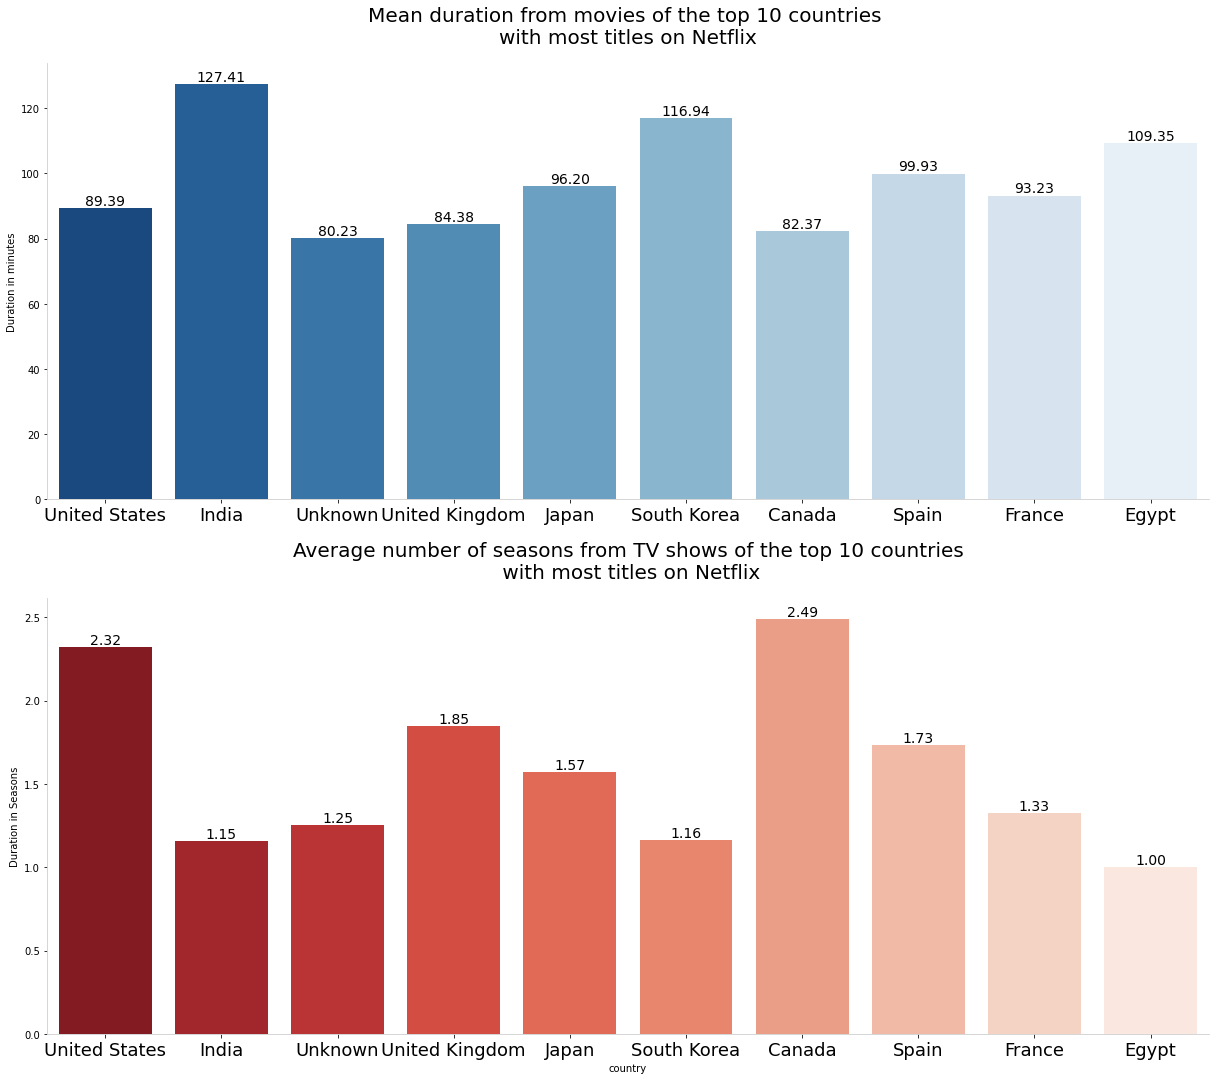

In [ ]:
# Extracting top 10 countries with most titles on Netflix
top_countries = _Netflix_['country'].value_counts().index[:10]
df_countries = _Netflix_.query('country in (@top_countries)')

# Defining figure and axis
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(17, 15))

# Plotting average duration for movies of top 10 countries
plot_aggregation(df=df_countries.query('type == "Movie"'), group_col='country', palette='Blues_r',
                 value_col='duration_time', aggreg='mean', ax=axs[0], order=top_countries, size_title=20,
                 title='Mean duration from movies of the top 10 countries \nwith most titles on Netflix')

# Plotting average number os seasons for TV shows of top 10 countries
plot_aggregation(df=df_countries.query('type == "TV Show"'), group_col='country', palette='Reds_r',
                 value_col='duration_time', aggreg='mean', ax=axs[1], order=top_countries, size_title=20,
                 title='Average number of seasons from TV shows of the top 10 countries\n with most titles on Netflix')

# layout
plt.tight_layout()
plt.setp(axs[0].get_xticklabels(), fontsize=18)
plt.setp(axs[1].get_xticklabels(), fontsize=18)
axs[0].set_xlabel('')
axs[0].set_ylabel('Duration in minutes')
axs[1].set_ylabel('Duration in Seasons')
plt.show()

<b>Here the aggregation plots are shows that the mean duration time of movies and tv shows of top 10 content provided country. 
Here we see that mean time of Indian movies are 127 minutes and mean season of tv shows are 1.5.  

# <b> Find the movie of actor/actress

In [ ]:
# #create a function for putting in name of actor and getting films/shows they are in 
# import collections
# col = "listed_in"
# categories = ", ".join(_Netflix_['listed_in']).split(", ")
# actorDictionary = {}
# counter_list = collections.Counter(categories).most_common(1000)
# counter_list = counter_list[1:1000]
# Actors = [_[0] for _ in counter_list][::-1]
# justActors = pd.DataFrame()
# justActors['title'] = _Netflix_['title']
# justActors['cast'] = _Netflix_['cast']



# #cycle through the labels and if they - i know its the worst fofrmula ever
# count = 0
# for cols, rows in justActors.iterrows():
#     for actor in Actors:
#         if actor in (rows[1]):
#             actorDictionary.setdefault(actor, []).append(rows[0])
#             count+=1

# actorDictionary
# print(count)

In [ ]:
# def findFilms(name):
#     x = actorDictionary[name]
#     print(x)
    

# findFilms('Aamir Khan')

# <b> Most used words on Description

In [ ]:
pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


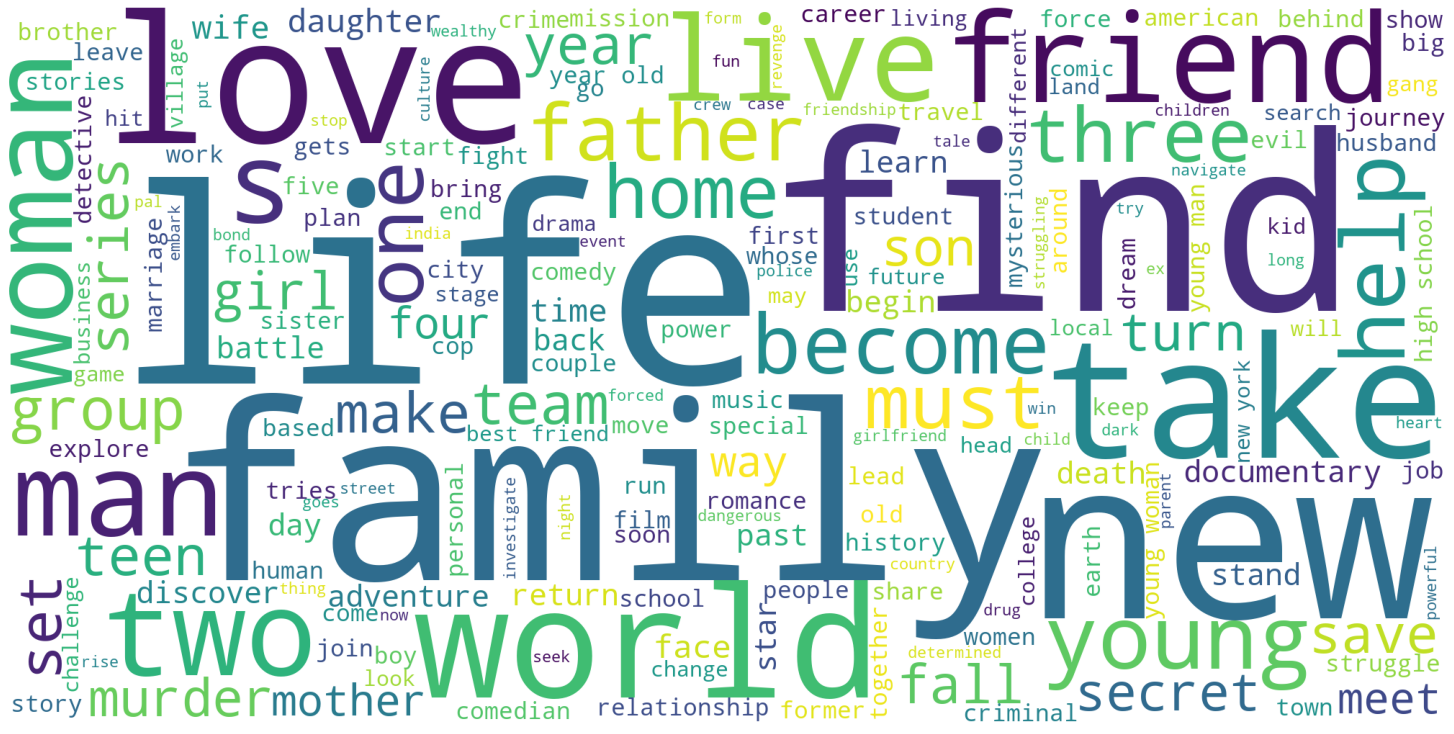

In [ ]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for ch in _Netflix_.description:
     
    # typecaste each val to string
    ch = str(ch)
 
    # split the value
    tokens = ch.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 2000, height = 1000,  background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (20,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

<b>In description most used words are like "Love", "Life", "Family", "New", "Find", "Woman", "Dream" etc.

# <b> India

In [ ]:
_Netflix_India =_Netflix_[_Netflix_['country']=='India'] # select the country "India"
_Netflix_India.head()

type                 title            director  \
8   Movie                   706       Shravan Kumar   
9   Movie                  1920        Vikram Bhatt   
18  Movie                15-Aug  Swapnaneel Jayakar   
20  Movie  ​​Kuch Bheege Alfaaz                Onir   
21  Movie          ​Goli Soda 2        Vijay Milton   

                                                 cast country  \
8   Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...   India   
9   Rajneesh Duggal, Adah Sharma, Indraneil Sengup...   India   
18  Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...   India   
20  Geetanjali Thapa, Zain Khan Durrani, Shray Rai...   India   
21  Samuthirakani, Bharath Seeni, Vinoth, Esakki B...   India   

            date_added  release_year rating duration  \
8        April 1, 2019          2019  TV-14  118 min   
9    December 15, 2017          2008  TV-MA  143 min   
18      March 29, 2019          2019  TV-14  124 min   
20   September 1, 2018          2018  TV-14  110 min   
21  September 15, 2018          2018  TV-14  128 min   

                                           listed_in  \
8                Horror Movies, International Movies   
9     Horror Movies, International Movies, Thrillers   
18              Comedies, Dramas, Independent Movies   
20  Dramas, Independent Movies, International Movies   
21  Action & Adventure, Dramas, International Movies   

                                          description release_month Age_Group  \
8   When a doctor goes missing, his psychiatrist w...         April     Teens   
9   An architect and his wife move into a castle t...      December    Adults   
18  On India's Independence Day, a zany mishap in ...         March     Teens   
20  After accidentally connecting over the Interne...     September     Teens   
21  A taxi driver, a gangster and an athlete strug...     September     Teens   

   country_  title_age_years  movie  tvshow  duration_time duration_scale  
8     India                3      1       0            118            min  
9     India               14      1       0            143            min  
18    India                3      1       0            124            min  
20    India                4      1       0            110            min  
21    India                4      1       0            128            min

# <b> How many types of Indian Content Present In Netflix

In [ ]:
category = _Netflix_India['type'].value_counts().to_frame().reset_index().rename(columns={'index':'type', 'type':'count'}) # select the types of contents
category

type  count
0    Movie    852
1  TV Show     71

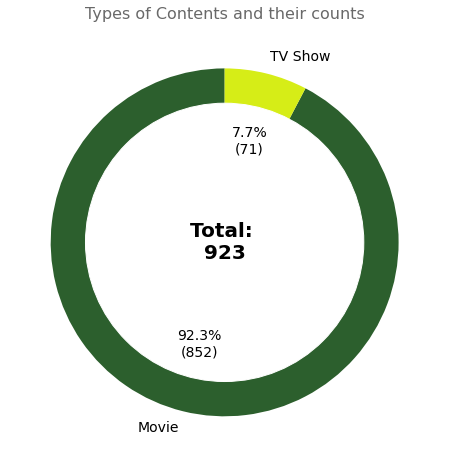

In [ ]:
# visualization 
plot_donut_chart(df=_Netflix_India, col='type', colors=['#2C5F2D','#D6ED17FF'],
                 title='Types of Contents and their counts')

<b>Total 923 Indian contents present in Netflix. Out of 923 contents 852(i.e. 92.3%) contents are Movie types and only 71 contents (i.e. only 7.7%) contents are TV Shows. 

# <b> In which year mostly Indian Contents released and which month is mostly preferred to released a movie

In [ ]:
content_release_year = _Netflix_India['release_year'].value_counts().to_frame().reset_index().rename(columns={'index':'release_year', 'release_year':'count'})
content_release_year # select the released year and their count 

release_year  count
0           2017    101
1           2018     95
2           2019     84
3           2016     73
4           2020     66
5           2015     62
6           2013     53
7           2014     51
8           2012     36
9           2010     35
10          2011     29
11          2009     27
12          2008     25
13          2005     20
14          2006     20
15          2007     16
16          2004     15
17          2003     12
18          2002      9
19          2001      8
20          2000      7
21          1999      6
22          1982      6
23          1998      5
24          1994      4
25          1983      4
26          1995      4
27          1990      4
28          1996      3
29          1997      3
30          1993      3
31          1985      2
32          1974      2
33          1989      2
34          1986      2
35          1988      2
36          1979      2
37          1980      2
38          1971      2
39          1975      2
40          1976      2
41          1973      2
42          1977      2
43          1972      2
44          1978      1
45          1984      1
46          1992      1
47          1981      1
48          1966      1
49          2021      1
50          1987      1
51          1969      1
52          1962      1
53          1964      1
54          1959      1

In [ ]:
content_release_month = _Netflix_India['release_month'].value_counts().to_frame().reset_index().rename(columns={'index':'release_year', 'release_year':'count'})
content_release_month # select the released month and their count 

release_year  release_month
0      December            110
1       October            105
2         March             95
3      November             90
4         April             86
5          July             76
6        August             74
7           May             70
8       January             67
9     September             56
10         June             47
11     February             47

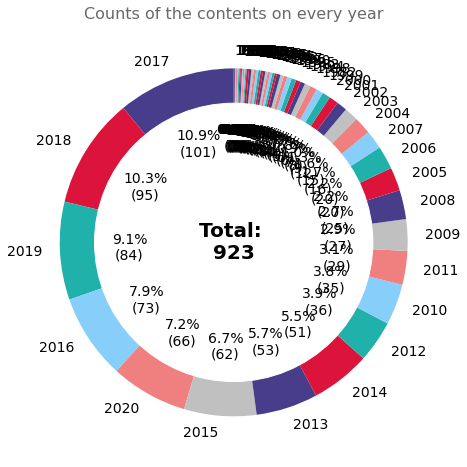

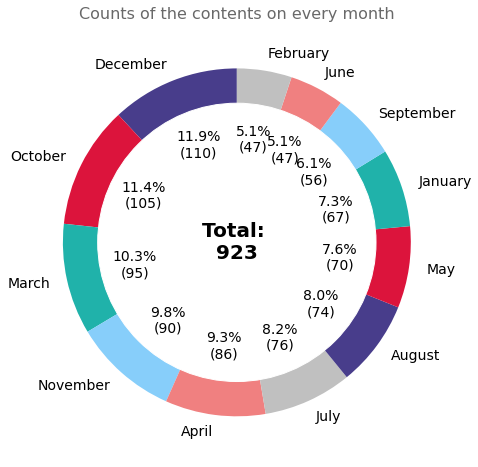

In [ ]:
# visualization
plot_donut_chart(df=_Netflix_India, col='release_year', color_continuous_scale=["orange", "red","green","blue","purple"],
                 title='Counts of the contents on every year')
plot_donut_chart(df=_Netflix_India, col='release_month', color_continuous_scale=["orange", "red","green","blue","purple"],
                 title='Counts of the contents on every month')

<b>In the year "2017", "2018" and "2019" mostly Indian Movies are released . Whereas "December", "October" and "March" is the most choosed month for release any Indian Contents by the Directors. 

# <b> Count of the contents on the basis of Ratings

In [ ]:
df_India = _Netflix_India.groupby(by=["rating", "Age_Group"]).size().reset_index(name="counts") # select the age group/rating and their counts 
df_India

rating   Age_Group  counts
0         NR      Adults       5
1         PG  Older Kids       3
2      PG-13       Teens       4
3          R      Adults       2
4      TV-14       Teens     520
5       TV-G        Kids       9
6      TV-MA      Adults     228
7      TV-PG  Older Kids     133
8       TV-Y        Kids       6
9      TV-Y7  Older Kids      11
10  TV-Y7-FV  Older Kids       1
11        UR      Adults       1

In [ ]:
#  visualize the total count of contents 
fig = px.bar(df_India,x='rating', y = 'counts' ,text_auto='.2s',color="Age_Group", 
            title="Count of the contents on the basis of Ratings")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [ ]:
movies_India = pd.DataFrame(_Netflix_India.loc[_Netflix_India['type'] == 'Movie']) # select the ratings for indian movies 
movies_India.head(3)

type   title            director  \
8   Movie     706       Shravan Kumar   
9   Movie    1920        Vikram Bhatt   
18  Movie  15-Aug  Swapnaneel Jayakar   

                                                 cast country  \
8   Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...   India   
9   Rajneesh Duggal, Adah Sharma, Indraneil Sengup...   India   
18  Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...   India   

           date_added  release_year rating duration  \
8       April 1, 2019          2019  TV-14  118 min   
9   December 15, 2017          2008  TV-MA  143 min   
18     March 29, 2019          2019  TV-14  124 min   

                                         listed_in  \
8              Horror Movies, International Movies   
9   Horror Movies, International Movies, Thrillers   
18            Comedies, Dramas, Independent Movies   

                                          description release_month Age_Group  \
8   When a doctor goes missing, his psychiatrist w...         April     Teens   
9   An architect and his wife move into a castle t...      December    Adults   
18  On India's Independence Day, a zany mishap in ...         March     Teens   

   country_  title_age_years  movie  tvshow  duration_time duration_scale  
8     India                3      1       0            118            min  
9     India               14      1       0            143            min  
18    India                3      1       0            124            min

In [ ]:
# visualize the ratings for indian movies
fig = px.histogram(movies_India, x = 'rating', hover_data = ['Age_Group'],text_auto='.2s',color="Age_Group",
                   title="Count of the movies on the basis of Ratings")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [ ]:
tv_shows_India = pd.DataFrame(_Netflix_India.loc[_Netflix_India['type'] == 'TV Show']) # select the ratings for indian tv show 
tv_shows_India.head(3)

type                         title     director  \
86   TV Show  21 Sarfarosh: Saragarhi 1897      Unknown   
132  TV Show                     7 (Seven)  Nizar Shafi   
340  TV Show                  Agent Raghav      Unknown   

                                                  cast country  \
86                  Luke Kenny, Mohit Raina, Mukul Dev   India   
132  Rahman, Havish, Regina Cassandra, Nandita Swet...   India   
340  Sharad Kelkar, Aahana Kumra, Mahesh Manjrekar,...   India   

           date_added  release_year rating  duration  \
86   December 1, 2018          2018  TV-14  1 Season   
132     July 30, 2019          2019  TV-14  1 Season   
340    April 15, 2017          2015  TV-14  1 Season   

                                             listed_in  \
86                   International TV Shows, TV Dramas   
132                                           TV Shows   
340  Crime TV Shows, International TV Shows, TV Act...   

                                           description release_month  \
86   In one of history's greatest last stands, a ba...      December   
132  Multiple women report their husbands as missin...          July   
340  A mix of brilliance, erudition and skill enabl...         April   

    Age_Group country_  title_age_years  movie  tvshow  duration_time  \
86      Teens    India                4      0       1              1   
132     Teens    India                3      0       1              1   
340     Teens    India                7      0       1              1   

    duration_scale  
86          Season  
132         Season  
340         Season

In [ ]:
# visualize the ratings for indian tv shows 
fig = px.histogram(tv_shows_India, x = 'rating', hover_data = ['Age_Group'],text_auto='.2s',color="Age_Group",
                   title="Count of the TV Shows on the basis of Ratings")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

<b>Overall mostly Indian contents are categorised as "Teen". In movie section also, The Teen categorised movies are highest in number but in TV Shows the "Adult"s contents are slightly above than Teen contents. 

# <b> Count of contents on the basis on Genre

In [ ]:
genre_India=list(_Netflix_India['listed_in']) # select the indian genre column 
genre_list_India=[] # create a genre list to put unique genre id 

for i in genre_India:
    i=list(i.split(','))
    for j in i:
        genre_list_India.append(j.replace(' ',""))
genre_dict_India=Counter(genre_list_India) # make a dictionary of genre from genre list using dictionary subclass 
genre_dict_India={k: v for k, v in sorted(genre_dict_India.items(), key=lambda item: item[1], reverse= True)}

In [ ]:
genre_dict_India

{'InternationalMovies': 785,
 'Dramas': 589,
 'Comedies': 293,
 'IndependentMovies': 129,
 'Action&Adventure': 124,
 'RomanticMovies': 111,
 'Music&Musicals': 90,
 'Thrillers': 85,
 'InternationalTVShows': 59,
 'HorrorMovies': 31,
 'TVComedies': 25,
 'TVDramas': 24,
 'Documentaries': 18,
 'Children&FamilyMovies': 16,
 'SportsMovies': 15,
 'ClassicMovies': 11,
 'Sci-Fi&Fantasy': 10,
 "Kids'TV": 10,
 'RomanticTVShows': 9,
 'CrimeTVShows': 8,
 'TVHorror': 7,
 'Docuseries': 7,
 'Stand-UpComedy': 6,
 'TVAction&Adventure': 5,
 'CultMovies': 5,
 'TVThrillers': 3,
 'TVMysteries': 3,
 'Faith&Spirituality': 3,
 'TVSci-Fi&Fantasy': 3,
 'RealityTV': 3,
 'Stand-UpComedy&TalkShows': 3,
 'TVShows': 2,
 'LGBTQMovies': 2,
 'BritishTVShows': 1,
 'TeenTVShows': 1}

In [ ]:
df_genre_India = pd.DataFrame(list(genre_dict_India.items()),columns = ['Genre', 'Count']) # create a dataframe using genere dictionary 
df_genre_India

Genre  Count
0        InternationalMovies    785
1                     Dramas    589
2                   Comedies    293
3          IndependentMovies    129
4           Action&Adventure    124
5             RomanticMovies    111
6             Music&Musicals     90
7                  Thrillers     85
8       InternationalTVShows     59
9               HorrorMovies     31
10                TVComedies     25
11                  TVDramas     24
12             Documentaries     18
13     Children&FamilyMovies     16
14              SportsMovies     15
15             ClassicMovies     11
16            Sci-Fi&Fantasy     10
17                   Kids'TV     10
18           RomanticTVShows      9
19              CrimeTVShows      8
20                  TVHorror      7
21                Docuseries      7
22            Stand-UpComedy      6
23        TVAction&Adventure      5
24                CultMovies      5
25               TVThrillers      3
26               TVMysteries      3
27        Faith&Spirituality      3
28          TVSci-Fi&Fantasy      3
29                 RealityTV      3
30  Stand-UpComedy&TalkShows      3
31                   TVShows      2
32               LGBTQMovies      2
33            BritishTVShows      1
34               TeenTVShows      1

In [ ]:
# visualization
fig = px.bar(df_genre_India, x='Genre', y='Count',text_auto='.2s', color = 'Count', width = 1300, height = 800,
             title="Count of the contents on the basis of Genre")
fig.show()

<b>Top 10 genre presents in Netflix are "Internatiional Movies" , "Dramas", "Comedies", "Independent Movies", "Action and Adventure", "Romantic Movies", "Music and Musical", "Thrillers", "International TV Shows", and "Horror Movies"

# <b> Top cast in India 

In [ ]:
cast_list_India = cast(''.join(list(_Netflix_India['cast'].fillna(' ').values))) # create a cast list from the column cast 
dataframe_cast_India = pd.DataFrame(cast_list_India, columns=['name']) # create a data frame using cast list  
dataframe_cast_India

name
0               Divya Dutta
1             Atul Kulkarni
2              Mohan Agashe
3              Anupam Shyam
4         Raayo S. Bakhirta
...                     ...
5961       Manish Chaudhary
5962           Meghna Malik
5963          Malkeet Rauni
5964         Anita Shabdish
5965  Chittaranjan Tripathy

[5966 rows x 1 columns]

In [ ]:
counts = Counter(cast_list_India) # using dictionary subclass
cast_list_India = sorted(counts, key=counts.get, reverse=True) # sorted the list 
print(cast_list_India)

['Anupam Kher', 'Om Puri', 'Paresh Rawal', 'Kareena Kapoor', 'Boman Irani', 'Yashpal Sharma', 'Naseeruddin Shah', 'Kay Kay Menon', 'Tinnu Anand', 'Amrish Puri', 'Katrina Kaif', 'Vijay Raaz', 'Asrani', 'Gulshan Grover', 'Rajesh Sharma', 'Manoj Joshi', 'Vipin Sharma', 'Manoj Bajpayee', 'Sanjay Mishra', 'Jackie Shroff', 'Mohnish Bahl', 'Pankaj Tripathi', 'Kulbhushan Kharbanda', 'Shakti Kapoor', 'Sharat Saxena', 'Mahesh Manjrekar', 'Saif Ali Khan', 'Radhika Apte', 'Rajpal Yadav', 'Sachin Khedekar', 'B.N. Sharma', 'Karamjit Anmol', 'Sunil Shetty', 'Ranvir Shorey', 'Seema Biswas', 'Divya Dutta', 'Shraddha Kapoor', 'Jimmy Shergill', 'Saurabh Shukla', 'Neha Dhupia', 'Priyanka Chopra', 'Adil Hussain', 'Zakir Hussain', 'Amitabh Bachchan', 'Brijendra Kala', 'Rajit Kapoor', 'Raj Babbar', 'Dalip Tahil', 'Prem Chopra', 'Kalki Koechlin', 'Juhi Chawla', 'Amrita Rao', 'Atul Kulkarni', 'Deepika Padukone', 'Farida Jalal', 'Mithun Chakraborty', 'Danny Denzongpa', 'Alok Nath', 'Vikram Gokhale', 'Salman Kha

In [ ]:
cast_count_list_India = list(dataframe_cast_India['name'].value_counts()) # count the unique appearence 
cast_count_list_India[:30]

[33,
 23,
 23,
 19,
 16,
 16,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10]

In [ ]:
data_cast_India = pd.DataFrame(list(zip(cast_list_India, cast_count_list_India)),
               columns =['Actor/Actress Name', 'Count']).head(30) # create a data frame using cast list and count list
data_cast_India

Actor/Actress Name  Count
0            Anupam Kher     33
1                Om Puri     23
2           Paresh Rawal     23
3         Kareena Kapoor     19
4            Boman Irani     16
5         Yashpal Sharma     16
6       Naseeruddin Shah     14
7          Kay Kay Menon     14
8            Tinnu Anand     14
9            Amrish Puri     14
10          Katrina Kaif     14
11            Vijay Raaz     14
12                Asrani     14
13        Gulshan Grover     13
14         Rajesh Sharma     13
15           Manoj Joshi     13
16          Vipin Sharma     12
17        Manoj Bajpayee     12
18         Sanjay Mishra     12
19         Jackie Shroff     11
20          Mohnish Bahl     11
21       Pankaj Tripathi     11
22  Kulbhushan Kharbanda     11
23         Shakti Kapoor     11
24         Sharat Saxena     11
25      Mahesh Manjrekar     10
26         Saif Ali Khan     10
27          Radhika Apte     10
28          Rajpal Yadav     10
29       Sachin Khedekar     10

In [ ]:
# visualization
fig = px.bar(data_cast_India, x='Actor/Actress Name', y='Count',text_auto='.2s', color = 'Count', width = 1300, height = 800,
             title="Overall top cast of Indian")
fig.show()

<b>Overall top 10 cast of India are "Anupam Kher", "Om Puri", "Paresh Rawal", "Kareena Kapoor", "Boman Irani", "Yashpal Sharma", "Naseeruddin Shah","Kay Kay Menon", "Tinnu Anand" and "Amrish Puri" 

In [ ]:
movies_India = pd.DataFrame(_Netflix_India.loc[_Netflix_India['type'] == 'Movie']) # create a data frame using indian movie 
tv_shows_India = pd.DataFrame(_Netflix_India.loc[_Netflix_India['type'] == 'TV Show']) # create a data frame using indian tv show 

In [ ]:
movies_cast_list_India = cast(''.join(list(movies_India['cast'].fillna(' ').values))) # select the unique cast for indian movies 
df_cast_movies_India = pd.DataFrame(movies_cast_list_India, columns=['name']) # create a cast dat farme using movie cast list
tv_show_cast_list_India = cast(''.join(list(tv_shows_India['cast'].fillna(' ').values))) # select the unique cast for indian tv sho
df_cast_tv_show_India = pd.DataFrame(tv_show_cast_list_India, columns=['name']) # create a cast dat farme using movie cast list

In [ ]:
counts = Counter(movies_cast_list_India)
movies_cast_list_India = sorted(counts, key=counts.get, reverse=True)
print(movies_cast_list_India)

counts = Counter(tv_show_cast_list_India)
tv_show_cast_list_India = sorted(counts, key=counts.get, reverse=True)
print(tv_show_cast_list_India)

['Anupam Kher', 'Om Puri', 'Paresh Rawal', 'Kareena Kapoor', 'Boman Irani', 'Yashpal Sharma', 'Naseeruddin Shah', 'Kay Kay Menon', 'Tinnu Anand', 'Amrish Puri', 'Katrina Kaif', 'Vijay Raaz', 'Asrani', 'Gulshan Grover', 'Rajesh Sharma', 'Manoj Joshi', 'Vipin Sharma', 'Manoj Bajpayee', 'Sanjay Mishra', 'Jackie Shroff', 'Mohnish Bahl', 'Kulbhushan Kharbanda', 'Shakti Kapoor', 'Sharat Saxena', 'Saif Ali Khan', 'Pankaj Tripathi', 'Radhika Apte', 'Rajpal Yadav', 'Sachin Khedekar', 'B.N. Sharma', 'Karamjit Anmol', 'Sunil Shetty', 'Divya Dutta', 'Shraddha Kapoor', 'Jimmy Shergill', 'Saurabh Shukla', 'Neha Dhupia', 'Priyanka Chopra', 'Zakir Hussain', 'Amitabh Bachchan', 'Brijendra Kala', 'Raj Babbar', 'Dalip Tahil', 'Prem Chopra', 'Ranvir Shorey', 'Seema Biswas', 'Juhi Chawla', 'Amrita Rao', 'Atul Kulkarni', 'Mahesh Manjrekar', 'Deepika Padukone', 'Farida Jalal', 'Mithun Chakraborty', 'Danny Denzongpa', 'Alok Nath', 'Vikram Gokhale', 'Adil Hussain', 'Salman Khan', 'Sonali Kulkarni', 'Arbaaz Kha

In [ ]:
movie_cast_count_list_India = list(df_cast_movies_India['name'].value_counts()) # count the total appearence on movies 
movie_cast_count_list_India[:30]

[33,
 23,
 23,
 19,
 16,
 16,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10]

In [ ]:
tv_show_cast_count_list_India = list(df_cast_tv_show_India['name'].value_counts()) # count the total appearence on tv show 
tv_show_cast_count_list_India[:30]

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
data_movie_cast_India = pd.DataFrame(list(zip(movies_cast_list_India, movie_cast_count_list_India)),
               columns =['Actor/Actress Name', 'Count']).head(30) # create a dataframe using movie cast list and count list 
data_movie_cast_India

Actor/Actress Name  Count
0            Anupam Kher     33
1                Om Puri     23
2           Paresh Rawal     23
3         Kareena Kapoor     19
4            Boman Irani     16
5         Yashpal Sharma     16
6       Naseeruddin Shah     14
7          Kay Kay Menon     14
8            Tinnu Anand     14
9            Amrish Puri     14
10          Katrina Kaif     14
11            Vijay Raaz     14
12                Asrani     14
13        Gulshan Grover     13
14         Rajesh Sharma     13
15           Manoj Joshi     13
16          Vipin Sharma     12
17        Manoj Bajpayee     12
18         Sanjay Mishra     12
19         Jackie Shroff     11
20          Mohnish Bahl     11
21  Kulbhushan Kharbanda     11
22         Shakti Kapoor     11
23         Sharat Saxena     11
24         Saif Ali Khan     10
25       Pankaj Tripathi     10
26          Radhika Apte     10
27          Rajpal Yadav     10
28       Sachin Khedekar     10
29           B.N. Sharma     10

In [ ]:
data_tv_show_cast_India = pd.DataFrame(list(zip(tv_show_cast_list_India, tv_show_cast_count_list_India)),
               columns =['Actor/Actress Name', 'Count']).head(30) # create a data frame using tv show cast list and count list
data_tv_show_cast_India

Actor/Actress Name  Count
0                            Aahana Kumra      2
1                        Mahesh Manjrekar      2
2                          Reena Aggarwal      2
3                           Chandan Anand      2
4                           Julie Tejwani      2
5                            Rupa Bhimani      2
6                          Jigna Bhardwaj      2
7                             Rajesh Kava      2
8                            Shreya Mehta      2
9                          Rajesh Tailang      2
10                       Siddhant Karnick      2
11                          Nishka Raheja      2
12                            Aranya Kaur      2
13                           Sabina Malik      2
14                             Luke Kenny      1
15                            Mohit Raina      1
16                        Mukul DevRahman      1
17                                 Havish      1
18                       Regina Cassandra      1
19                         Nandita Swetha      1
20                         Anisha Ambrose      1
21                       Tridha Choudhury      1
22                        Pujitha Ponnada      1
23                Aditi AryaSharad Kelkar      1
24                        Deepali Pansare      1
25                          Danish Pandor      1
26                             Jason Tham      1
27                Swati RajputKiku Sharda      1
28                          Vishal Kotian      1
29  Delnaaz IraniUnknownGashmeer Mahajani      1

In [ ]:
# visualization for indian movie cast
fig = px.bar(data_movie_cast_India, x='Actor/Actress Name', y='Count',text_auto='.2s', color = 'Count', width = 1300, height = 800,
             title="Top cast on Movies")
fig.show()
# visualization for indian tv show  cast
fig = px.bar(data_tv_show_cast_India, x='Actor/Actress Name', y='Count',text_auto='.2s', color = 'Count', width = 1300, height = 800,
             title="Top cast on TV Shows")
fig.show()

<b>Top 10 cast for Indian TV shows are "Aahana Kumra",	"Mahesh Manjrekar",	"Reena Aggarwal",	"Chandan Anand",	"Julie Tejwani",	"Rupa Bhimani",	"Jigna Bhardwaj",	"Rajesh Kava",	"Shreya Mehta",	"Rajesh Tailang",	"Siddhant Karnick".	

# <b> Top Directors of India

In [ ]:
_Netflix_India['director'].value_counts().sort_values(ascending=False)

Unknown               75
David Dhawan           9
Rajkumar Santoshi      6
Imtiaz Ali             6
Ashutosh Gowariker     6
                      ..
Pradeep Verma          1
Manu Ashokan           1
Manoj Beedha           1
Anoop Sathyan          1
Mozez Singh            1
Name: director, Length: 614, dtype: int64

In [ ]:
director_list_India = list(_Netflix_India['director'])

In [ ]:
counts = Counter(director_list_India)
director_list_India = sorted(counts, key=counts.get, reverse=True)
print(director_list_India)

['Unknown', 'David Dhawan', 'Ram Gopal Varma', 'Rajkumar Santoshi', 'Anees Bazmee', 'Imtiaz Ali', 'Sooraj R. Barjatya', 'Ashutosh Gowariker', 'Vishal Bhardwaj', 'Rajiv Mehra', 'Prakash Jha', 'Umesh Mehra', 'Anurag Basu', 'Mahesh Manjrekar', 'Anurag Kashyap', 'Madhur Bhandarkar', 'Rohit Shetty', 'Indra Kumar', 'Nagesh Kukunoor', 'Abbas Alibhai Burmawalla, Mastan Alibhai Burmawalla', 'Milan Luthria', 'Hrishikesh Mukherjee', 'Priyadarshan', 'Rakeysh Omprakash Mehra', 'Kundan Shah', 'Nishikant Kamat', 'Farah Khan', 'Subhash Ghai', 'Dibakar Banerjee', 'Shyam Benegal', 'Rajkumar Hirani', "Remo D'Souza", 'Neeraj Pandey', 'Chandrakant Kulkarni', 'Raj Kumar Gupta', 'Satish Rajwade', 'Vikramaditya Motwane', 'Lekh Tandon', 'Sumitra Bhave, Sunil Sukthankar', 'Sujoy Ghosh', 'Raj Kapoor', 'Mahesh Bhatt', 'Aziz Mirza', 'Sudhir Mishra', 'Ken Ghosh', 'Abhishek Chaubey', 'Abhinay Deo', 'Farhan Akhtar', 'Zoya Akhtar', 'Mani Ratnam', 'Abhishek Kapoor', 'Amitoj Mann', 'Nila Madhab Panda', 'Prakash Mehra', 

In [ ]:
director_count_list_India = list(_Netflix_India['director'].value_counts())
director_count_list_India[:30]

[75,
 9,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [ ]:
data_director_India = pd.DataFrame(list(zip(director_list_India, director_count_list_India)),
               columns =['Director Name', 'Count']).head(30)
data_director_India = data_director_India.iloc[1:31]
data_director_India

Director Name  Count
1                                        David Dhawan      9
2                                     Ram Gopal Varma      6
3                                   Rajkumar Santoshi      6
4                                        Anees Bazmee      6
5                                          Imtiaz Ali      6
6                                  Sooraj R. Barjatya      6
7                                  Ashutosh Gowariker      6
8                                     Vishal Bhardwaj      5
9                                         Rajiv Mehra      5
10                                        Prakash Jha      5
11                                        Umesh Mehra      5
12                                        Anurag Basu      5
13                                   Mahesh Manjrekar      5
14                                     Anurag Kashyap      5
15                                  Madhur Bhandarkar      5
16                                       Rohit Shetty      5
17                                        Indra Kumar      5
18                                    Nagesh Kukunoor      4
19  Abbas Alibhai Burmawalla, Mastan Alibhai Burma...      4
20                                      Milan Luthria      4
21                               Hrishikesh Mukherjee      4
22                                       Priyadarshan      4
23                            Rakeysh Omprakash Mehra      4
24                                        Kundan Shah      4
25                                    Nishikant Kamat      4
26                                         Farah Khan      4
27                                       Subhash Ghai      4
28                                   Dibakar Banerjee      4
29                                      Shyam Benegal      4

In [ ]:
fig = px.bar(data_director_India, x='Director Name', y='Count',text_auto='.2s', color = 'Count', width = 1300, height = 800,
             title="Top Indians Director")
fig.show()

<b>Top 10 directors of Indian are 'David Dhawan',	'Ram Gopal Varma',	'Rajkumar Santoshi',	'Anees Bazmee',	'Imtiaz Ali',	'Sooraj R. Barjatya',	'Ashutosh Gowariker',	'Vishal Bhardwaj',	'Rajiv Mehra', and	'Prakash Jha'	

# <b> Indian Movies present in Netflix

In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Director', 'Release Year']),
                 cells=dict(values=[_Netflix_India['title'],_Netflix_India['director'],_Netflix_India['release_year']]))
                     ])
fig.show()

# <b><center> Feature Engineering

# <b> Import Modules for Topic Modelling

In [ ]:
pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nltk.util import ngrams
import nltk, re, string, gensim,unicodedata
from nltk.corpus import stopwords, wordnet as wn
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from collections import defaultdict
from gensim import corpora
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA 

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

from yellowbrick.cluster import KElbowVisualizer

In [ ]:
Netflix.head(3)

type  title           director  \
0  TV Show     3%            Unknown   
1    Movie   7:19  Jorge Michel Grau   
2    Movie  23:59       Gilbert Chan   

                                                cast    country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...     Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...

In [ ]:
Netflix_FE = Netflix.copy() # create a copy of main data set for topic modelling 

In [ ]:
Netflix_FE.head(3)

type  title           director  \
0  TV Show     3%            Unknown   
1    Movie   7:19  Jorge Michel Grau   
2    Movie  23:59       Gilbert Chan   

                                                cast    country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...     Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...

In [ ]:
Netflix_FE.fillna('',inplace=True)

In [ ]:
Netflix_FE = Netflix_FE.drop(['date_added','country','duration','release_year'], axis=1) # drop the columns 'date_added','country','duration','release_year' 

In [ ]:
Netflix_FE.head(3)

type  title           director  \
0  TV Show     3%            Unknown   
1    Movie   7:19  Jorge Michel Grau   
2    Movie  23:59       Gilbert Chan   

                                                cast rating  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  TV-MA   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  TV-MA   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      R   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...

In [ ]:
Netflix_FE = Netflix_FE.astype(str) # change the column data type to 'string'

In [ ]:
Netflix_FE['Clustering'] = (Netflix_FE['type']+''+Netflix_FE['director']+''+Netflix_FE['cast']+''+
                                Netflix_FE['title']+ ''+Netflix_FE['rating']+''+
                               Netflix_FE['listed_in']+''+Netflix_FE['description']) # create a new column 'clustering' with the data of the columns 'type','title','director','
                               # 'cast' , 'rating','listed_in' and 'description'

In [ ]:
list(Netflix_FE['Clustering']) # view of the new column

['TV ShowUnknownJoão Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi3%TV-MAInternational TV Shows, TV Dramas, TV Sci-Fi & FantasyIn a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.',
 'MovieJorge Michel GrauDemián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato7:19TV-MADramas, International MoviesAfter a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.',
 "MovieGilbert ChanTedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim23:59RHorror Movies, International MoviesWhen an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training ca

# <b> Latent Dirichlet Allocation (LDA)

<b> Linear Discriminant Analysis (LDA) is one of the commonly used dimensionality reduction techniques in machine learning to solve more than two-class classification problems. It is also known as Normal Discriminant Analysis (NDA) or Discriminant Function Analysis (DFA).

Linear Discriminant analysis is one of the most popular dimensionality reduction techniques used for supervised classification problems in machine learning.

In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# create a function to get top n words 
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    vectorized_description = count_vectorizer.fit_transform(text_data.values) # vectorised clustering columns 
    total_ = np.sum(vectorized_description, axis=0) # count the total sum
    word_indice = np.flip(np.argsort(total_)[0,:], 1)
    word_value = np.flip(np.sort(total_)[0,:],1)
    
    word_vector = np.zeros((n_top_words, vectorized_description.shape[1]))
    for i in range(n_top_words):
        word_vector[i,word_indice[0,i]] = 1

    word = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vector)]

    return (word, word_value[0,:n_top_words].tolist()[0])

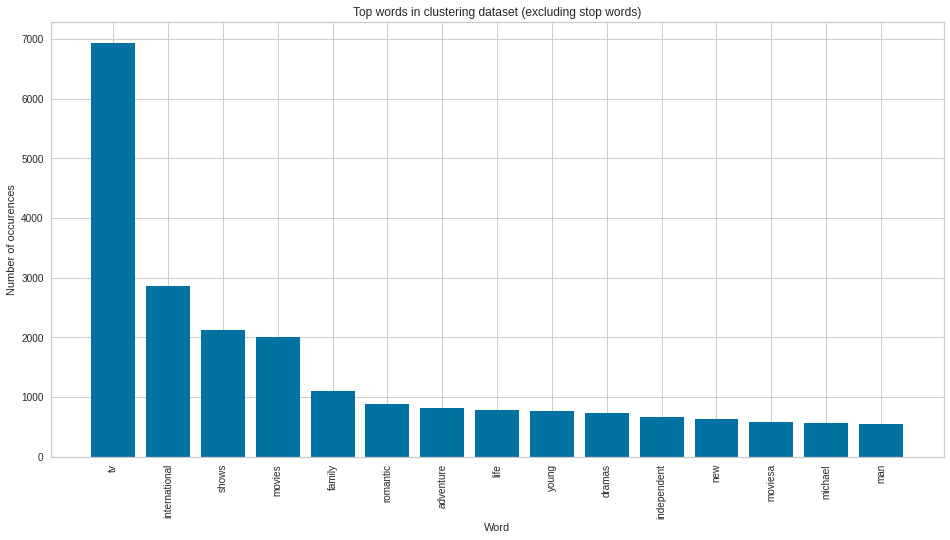

In [ ]:
# visualization of top 10 words
count_vectorizer = CountVectorizer(stop_words='english')
word, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=Netflix_FE['Clustering'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in clustering dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

<b> Therefor, top 15 words present in my data set are    
'tv', 'international','shows','movies','family','romantic','adventure','life','young','dramas','independent','new','moviesa','michael', and 'men'

In [ ]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=20000)
small_text_sample = Netflix_FE['Clustering'].sample(n=5000, random_state=42).values # description before vectorization

print('description before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample) # description after vectorization

print('description after vectorization: \n{}'.format(small_document_term_matrix[123]))

description before vectorization: TV ShowDavid SchalkoUdo Kier, Sunnyi Melles, Nicholas Ofczarek, Manuel Rubey, Nora von Waldstätten, Thomas Stipsits, Ursula Strauss, Robert Palfrader, Simon Schwarz, Johannes Krisch, Lukas MikoOld MoneyTV-MAInternational TV Shows, TV Comedies, TV DramasBackstabbing, blackmail and revenge consume the dysfunctional family of a wealthy patriarch as they compete to find him a new liver at all costs.
description after vectorization: 
  (0, 5120)	1
  (0, 15615)	1
  (0, 18672)	4
  (0, 16662)	1
  (0, 11593)	1
  (0, 9147)	1
  (0, 11721)	1
  (0, 17557)	1
  (0, 15452)	1
  (0, 19338)	1
  (0, 4459)	1
  (0, 8951)	1
  (0, 11616)	1
  (0, 9284)	1
  (0, 3019)	1
  (0, 16652)	1
  (0, 8119)	1
  (0, 17700)	1
  (0, 9691)	1
  (0, 19199)	1
  (0, 18183)	1
  (0, 12587)	1
  (0, 17013)	1
  (0, 16192)	1
  (0, 7658)	1
  (0, 10051)	1
  (0, 1802)	1
  (0, 3214)	1
  (0, 13016)	1
  (0, 3120)	1
  (0, 8772)	1
  (0, 3319)	1


In [ ]:
# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV
grid_params = {'n_components' : list(range(5,10))}

# LDA model
lda = LatentDirichletAllocation()
lda_model = GridSearchCV(lda,param_grid=grid_params)
lda_model.fit(small_document_term_matrix)

# Best LDA model
best_lda_model = lda_model.best_estimator_

print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(small_document_term_matrix))

Best LDA model's params {'n_components': 5}
Best log likelihood Score for the LDA model -331434.7062421966
LDA model Perplexity on train data 8560.829193826881


<b> So, by LDA model, we get that our data set will be divided in 5 clusters. Lets visualize the clusters by pyldavis module.  

In [ ]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

In [ ]:
# visualization clustering by lda model
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, small_document_term_matrix,small_count_vectorizer,mds='tsne')
lda_panel

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:819: FutureWarning:

'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming o

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      150.222153  -72.269554       1        1  23.165518
4       51.163364 -159.968018       2        1  21.087137
1      -73.144554   21.523815       3        1  20.273855
0      -66.410133 -110.606438       4        1  20.038358
2       54.417324   12.443444       5        1  15.435133, topic_info=           Term         Freq        Total Category  logprob  loglift
18672        tv  3919.000000  3919.000000  Default  30.0000  30.0000
16662     shows  1217.000000  1217.000000  Default  29.0000  29.0000
10614    movies  1141.000000  1141.000000  Default  28.0000  28.0000
5286         fi   167.000000   167.000000  Default  27.0000  27.0000
16197       sci   159.000000   159.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
12155       old    34.585077   176.136077   Topic5  -6.4928   0.2407
4301     dramas    38.700875   417.377668   Topic5  -6.3804  -0.5096
13059      paul    33.966650   177.237903   Topic5  -6.5109   0.2164
9220        man    34.302188   318.353998   Topic5  -6.5011  -0.3594
9075   madramas    33.965314   301.693503   Topic5  -6.5109  -0.3155

[387 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
12         2  0.015583  13action
12         3  0.264919  13action
12         4  0.046750  13action
12         5  0.670090  13action
28         2  0.229911  14action
...      ...       ...       ...
19802      5  0.111341     young
19818      1  0.250850        yu
19818      2  0.733255        yu
19831      2  0.983366      yuki
19920      2  0.992438     zhang

[699 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 2, 1, 3])

<b> Lets's look for the top 10 words per topic. Here we will see for 10 topics

In [ ]:
# Use LDA to look for 10 topics
n_topics = 11
model_lda = LatentDirichletAllocation(n_components=n_topics,random_state=42)
model_lda.fit(small_document_term_matrix)

# Print the top 10 words per topic
n_words = 10
feature_names = count_vectorizer.get_feature_names()

topic_list = []
for topic_idx, topic in enumerate(model_lda.components_):
    top_n_words = [feature_names[i]
              for i in topic.argsort()
               [-n_words:]][::-1]
    
    top_features = ' '.join(top_n_words)
    
    topic_list.append(f"topic_{'_'.join(top_n_words[:3])}") 

    print(f"Topic {topic_idx}: {top_features}")
    print('\n\n\n')
    
topic_result = model_lda.transform(small_document_term_matrix)
#Netflix_FE['Topic']  = topic_result.argmax(axis=1)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Topic 0: clarkziontv bartokleah bourgeois cannan complicarlo carlotta borromeobride coincide costaunknownelenatv ayahi




Topic 1: bourgeois clarkziontv droid 24 bartokleah borromeobride clasen casella azisnagita ayahi




Topic 2: filipinos elmore bourgeois egypttv castlestv droid carvel 13documentariessix camen buric




Topic 3: bourgeois clarkziontv clasen azisnagita 13documentarieschris causepg bungo brunson fuzzfakkah 13comediesdumped




Topic 4: chahinemajida clarkziontv bartokleah bourgeois ethics esler aractingirodney complicarlo filipinos 24




Topic 5: bourgeois filipinos clarkziontv coincide chats briggsjavid casella borromeobride complicarlo 24




Topic 6: filipinos azisnagita bartokleah bourgeois clarkziontv bligh cannan borromeobride droid complicarlo




Topic 7: bourgeois bartokleah clarkziontv 24 filipinos azisnagita chats blurred borromeobride complicarlo




Topic 8: clarkziontv bourgeois borromeobride fuzzfakkah droid frustrated bartokleah cannan casella compli

# <b> Removing non-ASCII characters

In [ ]:
# function to remove non-ascii characters

def remove_non_ascii(words): # create a function to remove no ascii character
    new_words = [] # create a blank list to store words after encode and decode
    for word in words: # every words in word
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        # unicode.normalize = Return the normal form form for the Unicode string unistr.
        # The normal form KD (NFKD) will apply the compatibility decomposition, i.e. replace all compatibility characters with their equivalents.
        #unicodedata.normalize('NFD',text) translates each character into its decomposed form (e.g. à becomes a), .
        #.encode('ascii','ignore') converts the normalized text into an ascii byte string (b'string') and ignores any errors.
        #.decode('utf-8') returns the string decoded from the given bytes,
        new_words.append(new_word) #append all the decode words in the list
    return new_words # return the list 

In [ ]:
Netflix_FE['Clustering'] = remove_non_ascii(Netflix_FE['Clustering']) # apply the function on the clustering columns 

# <b> Remove stopwords and lower case

<b> Here we will remove english stopwords from the clustering columns and lower the capitalized letter.

In [ ]:
nltk.download('stopwords') # download stopwords from natural language toolkit

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopword = stopwords.words('english') # Extracting  the english stopwords

In [ ]:
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def stop_word(text): # function to remove stop words
    stop_words = [word.lower() for word in text.split() if word.lower() not in stopword] # if the words are not stopwords then lower the letter
    return " ".join(stop_words) # join the words with space

In [ ]:
Netflix_FE['Clustering'] = Netflix_FE['Clustering'].apply(stop_word) # applying the stop words on the clustering coluumns 

In [ ]:
list(Netflix_FE['Clustering'])

['tv showunknownjoao miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zeze motta, celso frateschi3%tv-mainternational tv shows, tv dramas, tv sci-fi & fantasyin future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor.',
 'moviejorge michel graudemian bichir, hector bonilla, oscar serrano, azalia ortiz, octavio michel, carmen beato7:19tv-madramas, international moviesafter devastating earthquake hits mexico city, trapped survivors walks life wait rescued trying desperately stay alive.',
 "moviegilbert chantedd chan, stella chung, henley hii, lawrence koh, tommy kuan, josh lai, mark lee, susan leong, benjamin lim23:59rhorror movies, international movieswhen army recruit found dead, fellow soldiers forced confront terrifying secret that's haunting jungle island training camp.",
 'movieshane ackerelijah wood, john c. reilly, jennifer connelly, christopher plummer, c

# <b> Remove punctuations

<B> Here we wil remove punctution marks like he period, question mark, exclamation point, comma, colon, semicolon, dash, hyphen, brackets, braces, parentheses, apostrophe, quotation mark etc. 

In [ ]:
def remove_punctuation(text): # function to remove punctuations
    trans_punctuation = str.maketrans('', '', string.punctuation) # return the text stripped of punctuation marks
    return text.translate(trans_punctuation)

In [ ]:
Netflix_FE['Clustering'] = Netflix_FE['Clustering'].apply(remove_punctuation) # remove the punctuation from clustering columns 

# <b> Lemmatization

<b> Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item.

Lemmatization is the process of replacing a word with its root or head word called lemma. Aim is to reduce inflectional forms to a common base form.

A lemmatizer uses a knowledge base of word synonyms and word endings to ensure that only words that mean similar things are consolidated into a single token.

In [ ]:
nltk.download('wordnet') # download wordnet from natural language tool kit 
# WordNet links words into semantic relations including synonyms, hyponyms, and meronyms.

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def lemmatization(words): # function to lemmatize the corpus
    lemmatizer = WordNetLemmatizer() # using WordNetLemmatizer function to lemmatize words
    lemmas = [] # create a blank list to store the words after lemmatize
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v') # lemmatize the words where pos = verb
        lemmas.append(lemma) # append the lemmatize words on the list
    return lemmas # return the list

In [ ]:
Netflix_FE['Clustering'] = lemmatization(Netflix_FE['Clustering']) # apply lemmatization on clustering column 

# <b> Tokenization

<b> Tokenization is the process of breaking down the given text in natural language processing into the smallest unit in a sentence called a token. Punctuation marks, words, and numbers can be considered tokens. 

In [ ]:
tokenizer = TweetTokenizer() # using tweettokenizer to split paragraphs and sentences into smaller units that can be more easily assigned meaning.

In [ ]:
Netflix_FE['Clustering'] = Netflix_FE['Clustering'].apply(lambda x: tokenizer.tokenize(x)) # apply tokenizer on the clustering columns

In [ ]:
Netflix_FE['Clustering']

0       [tv, showunknownjoao, miguel, bianca, comparat...
1       [moviejorge, michel, graudemian, bichir, hecto...
2       [moviegilbert, chantedd, chan, stella, chung, ...
3       [movieshane, ackerelijah, wood, john, c, reill...
4       [movierobert, luketicjim, sturgess, kevin, spa...
                              ...                        
7782    [moviejosef, faresimad, creidi, antoinette, tu...
7783    [moviemozez, singhvicky, kaushal, sarahjane, d...
7784    [movieunknownnasty, czulu, man, japantvmadocum...
7785    [tv, showunknownadriano, zumbo, rachel, khoozu...
7786    [moviesam, dunnunknownzz, top, little, ol, ban...
Name: Clustering, Length: 7787, dtype: object

# <b> Vectorization

<b> Bag of words (BoW) converts the text into a feature vector by counting the occurrence of words in a document. It is not considering the importance of words. Term frequency — Inverse document frequency (TFIDF) is based on the Bag of Words (BoW) model, which contains insights about the less relevant and more relevant words in a document. 

<u>Term Frequency (TF)</u>

It is a measure of the frequency of a word (w) in a document (d). TF is defined as the ratio of a word’s occurrence in a document to the total number of words in a document. The denominator term in the formula is to normalize since all the corpus documents are of different lengths.

<u>Inverse Document Frequency (IDF)</u>

It is the measure of the importance of a word. Term frequency (TF) does not consider the importance of words. Some words such as’ of’, ‘and’, etc. can be most frequently present but are of little significance. IDF provides weightage to each word based on its frequency in the corpus D.








In [ ]:
data_cluster = Netflix_FE['Clustering'] # assign the cluster column in a variable

In [ ]:
# Tokenization
def tfid_vector(text): # create a function to vectorization
    return text
# Using TFIDF vectorizer to vectorize the corpus 
tfidf = TfidfVectorizer(tokenizer=tfid_vector, stop_words='english', lowercase=False,max_features = 20000)    
Vector = tfidf.fit_transform(data_cluster) # fit and transformation on clustering column

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.



In [ ]:
Vector

<7787x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 205361 stored elements in Compressed Sparse Row format>

In [ ]:
print(Vector.shape)

(7787, 20000)


In [ ]:
type(Vector)

scipy.sparse.csr.csr_matrix

In [ ]:
# convert X into array form for clustering
Vector = Vector.toarray()

In [ ]:
Vector

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# <b> Dimensionality reduction using PCA

<B> <U>Principal Component Analysis</U> is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning. It is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation. These new transformed features are called the Principal Components.
PCA works by considering the variance of each attribute because the high attribute shows the good split between the classes, and hence it reduces the dimensionality.

In [ ]:
#scaling

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(Vector)

In [ ]:
#Applying PCA

pca = PCA(random_state=42)
pca.fit(scaled_data)

PCA(random_state=42)

In [ ]:
# visualization of components and explained variance 
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "Components", "y": "Explained Variance"}
)

<B> Here we see that 90% of the cumulative variance explained by 5000 principal components. SO we worked with top 5000 components.

In [ ]:
# reducing the dimensions to 5000 using pca
pca = PCA(n_components=5000,random_state=42)
pca.fit(scaled_data)

PCA(n_components=5000, random_state=42)

In [ ]:
# print the number of components and percentage of total components 
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by 5k components
print('Cumulative variance explained by 5000 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [6.69718130e-03 4.38884634e-03 2.68277256e-03 ... 4.77865297e-05
 4.77399293e-05 4.77082364e-05]
Cumulative variance explained by 5000 principal components: 91.04%


In [ ]:
# transformed features
final_pca = pca.transform(scaled_data)

In [ ]:
final_pca.shape

(7787, 5000)

# <b> Clusters Implementation

# <center> <b> K Means Clustering

<B> K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.
It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm.

<b> cluster distance 

<B>Distortion is the average of the euclidean squared distance from the centroid of the respective clusters. Inertia is the sum of squared distances of samples to their closest cluster centre.

In [ ]:
inertia = [] # create a blank list to store distance ( Inertia is the sum of squared distances of samples to their closest cluster centre.)
distortions = [] # create a blank list to store distance  (Distortion is the average of the euclidean squared distance from the centroid of the respective clusters.)
K = range(1,11) # set the range of clusters 
for k in K: # on every iteration
    km = KMeans(n_clusters=k) # 
    km = km.fit(final_pca) # fit the model on data set 
    inertia.append(km.inertia_) # append the inertia distance to the list
    distortions.append(sum(np.min(cdist(final_pca, km.cluster_centers_, 'euclidean'),axis=1)) / final_pca.shape[0]) # append the distortion distance to the list

<b> Elbow Method

<B> The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. 

In [ ]:
df_elbow = pd.DataFrame(list(zip(K, distortions, inertia)), columns=["K","Distortions","Inertia"]) # create a data frame with cluster data and distance  
df_elbow
fig = make_subplots(rows=1, cols=2) # make the subplot 
fig.add_trace(go.Scatter(x=df_elbow["K"], y=df_elbow["Distortions"], name="Distortion"),row=1, col=1) # plot elbow graph to show distortion distance 
fig.add_trace(go.Scatter(x=df_elbow["K"], y=df_elbow["Inertia"], name="Inertia"),row=1, col=2) # plot elbow graph to show inertia distance 
fig.update_layout(template="plotly",title="Elbow method - Distortions and Inertia", xaxis_title="K", xaxis2_title="K") 

<b> Kneed Locator

<B> Use the Kneedle algorithm to detect the knee or elbow point when k means clustering so you define the optimum number of clusters to create via the Kneed Python package.

In [ ]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#finding the elbow using kneed locator
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing") # select optimal number of clusters 
kl_elbow = kl.elbow
kl_elbow

3

<b> Predict the values

In [ ]:
kmeans = KMeans(n_clusters=kl_elbow,init = 'k-means++', random_state=42) # model implementation on optimal number cluster
kmeans.fit(final_pca) # fit on data set 
y_kmeans = kmeans.predict(final_pca) # prediction on data set 
y_kmeans

array([2, 0, 0, ..., 0, 2, 0], dtype=int32)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



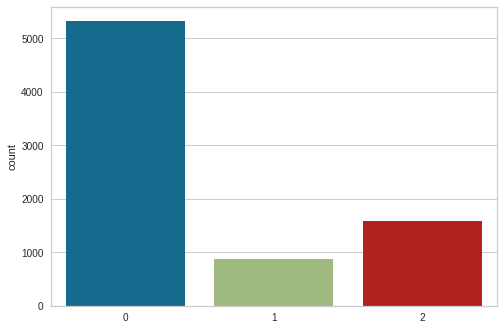

In [ ]:
sns.countplot(y_kmeans) 

In [ ]:
# print(final_pca[y_kmeans == 0,0][1])
# print(final_pca[y_kmeans == 0,1][1])
# print(final_pca[y_kmeans == 0,2][1])

In [ ]:
# 3d visualization of optimal number of clusters 
# labels = model.labels_
trace = go.Scatter3d(x=final_pca[:, 0], y=final_pca[:, 1], z=final_pca[:, 2], mode='markers',marker=dict(color = y_kmeans, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
#Add new column to store the cluster 
Netflix_FE['cluster'] = y_kmeans
Netflix_FE.head(3)

type  title           director  \
0  TV Show     3%            Unknown   
1    Movie   7:19  Jorge Michel Grau   
2    Movie  23:59       Gilbert Chan   

                                                cast rating  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  TV-MA   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  TV-MA   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      R   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   

                                          Clustering  cluster  
0  [tv, showunknownjoao, miguel, bianca, comparat...        2  
1  [moviejorge, michel, graudemian, bichir, hecto...        0  
2  [moviegilbert, chantedd, chan, stella, chung, ...        0

In [ ]:
centers = np.array(kmeans.cluster_centers_) # position of each data points 
centers
centroid = pd.DataFrame(centers) # make a data frame with all the centers 
centroid

0         1         2         3         4         5         6     \
0 -0.111796 -0.067423 -0.049706 -0.039340  0.002353 -0.002287 -0.004982   
1 -0.227800  0.157998  0.321507  0.199812 -0.026090  0.007251 -0.013764   
2  0.499251  0.138455 -0.010815  0.021528  0.006498  0.003654  0.024237   

       7         8         9     ...      4990      4991      4992      4993  \
0  0.010780  0.004329 -0.005292  ... -0.000051  0.000097 -0.000033  0.000120   
1 -0.018468 -0.030677  0.046078  ...  0.000289 -0.000242  0.000187 -0.000362   
2 -0.025879  0.002416 -0.007676  ...  0.000012 -0.000191  0.000007 -0.000202   

       4994      4995      4996      4997      4998      4999  
0 -0.000053  0.000078 -0.000010 -0.000008  0.000150  0.000004  
1  0.000558 -0.000490  0.000103 -0.000191 -0.000681  0.000226  
2 -0.000129  0.000008 -0.000022  0.000131 -0.000126 -0.000139  

[3 rows x 5000 columns]

In [ ]:
# plt.figure(figsize=(20 , 10))
# plt.title('description and listed_in')
# plt.scatter(final_pca[:, 0], final_pca[:, 1], c=y_kmeans, s=20, cmap='spring')

# centers = centers
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20, alpha=0.5)

<b> Silhoutte Score

<B> The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).

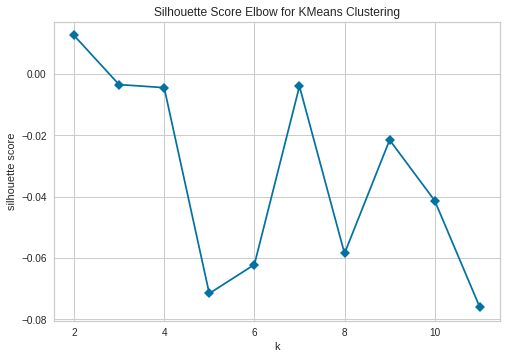

In [ ]:
# Silhoutte score elbow for k means clustering
model = KMeans(random_state=42)
sil_visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False, locate_elbow=False) # elbow visualizer for silhoutte
sil_visualizer.fit(final_pca) # fit the model on data set 
sil_visualizer.show() # show the graph

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
def silhouette_score_analysis(n):  # create a function to calcultae silhoutte score in every cluster  
  for n_clusters in range(2,n): # for iteration in user defined range
      km = KMeans (n_clusters=n_clusters, random_state=42) # set the model 
      predict = km.fit_predict(final_pca) # fit and predict on data set 
      centers = km.cluster_centers_ # se he centers of the clusters

      score = silhouette_score(final_pca, predict, metric='euclidean') # calculate the silhoutte score 
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score)) # print the score

      silhoutte_visualizer = SilhouetteVisualizer(km) # visualize the silhoutte score on k mean clustering 

      silhoutte_visualizer.fit(final_pca) # Fit the training data to the visualizer
      silhoutte_visualizer.show() # Draw/show/poof the data

For n_clusters = 2, silhouette score is 0.012628628042956783


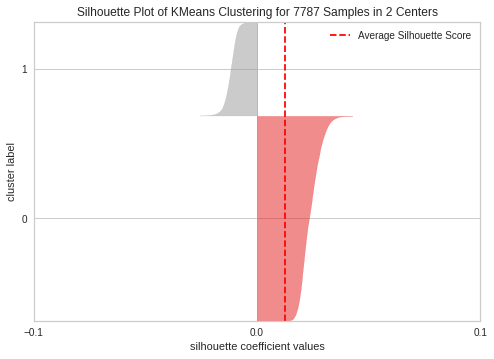

For n_clusters = 3, silhouette score is -0.003428803477758897


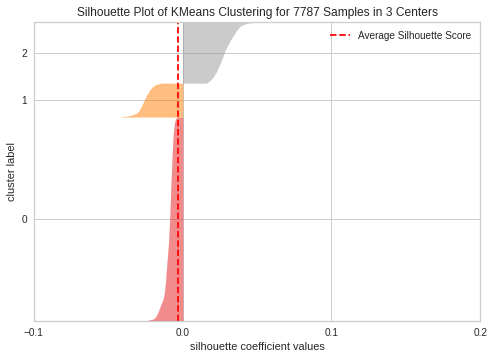

For n_clusters = 4, silhouette score is -0.004419234092326428


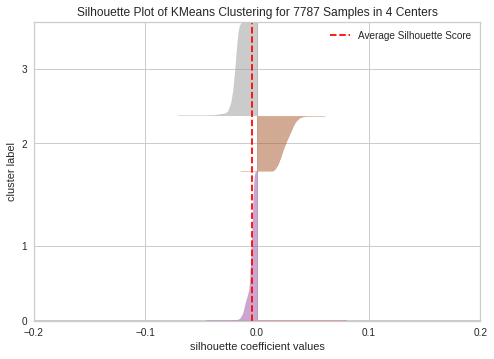

For n_clusters = 5, silhouette score is -0.07161448510565074


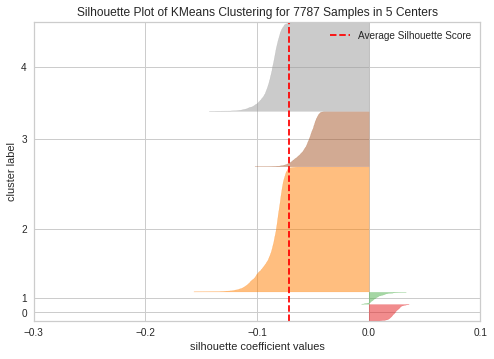

For n_clusters = 6, silhouette score is -0.06220938745542944


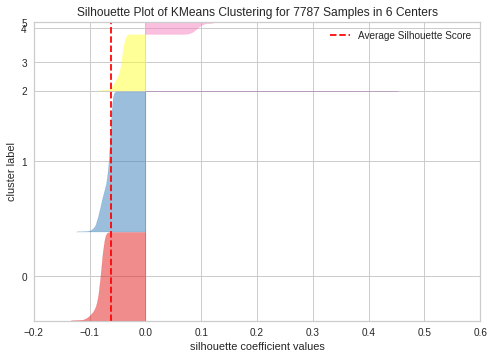

For n_clusters = 7, silhouette score is -0.003965332824944911


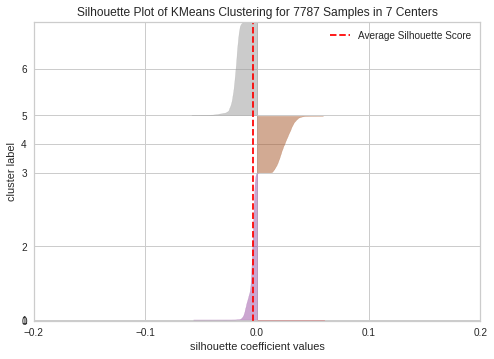

For n_clusters = 8, silhouette score is -0.05854624998561623


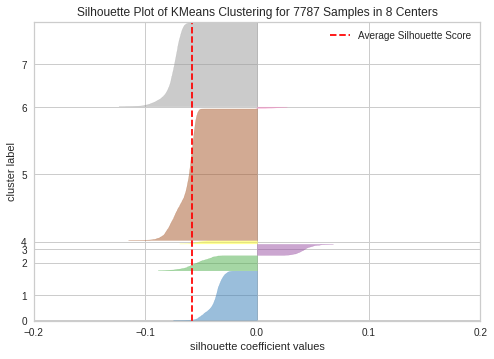

For n_clusters = 9, silhouette score is -0.021507221853701897


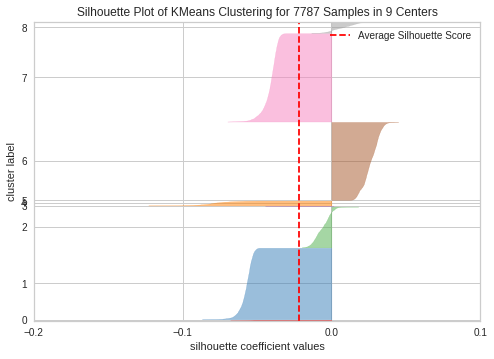

For n_clusters = 10, silhouette score is -0.04131415913813386


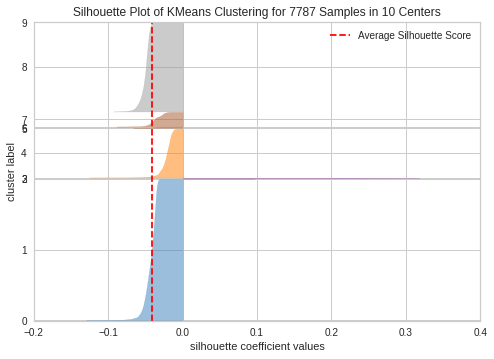

In [ ]:
silhouette_score_analysis(11) # plot the silhoutte score 

In [ ]:
# here we get positive silhoutte score for 2 clusters .. so here we select n_cluster = 2
kmeans = KMeans(n_clusters=2,init = 'k-means++', random_state=42)
kmeans.fit(final_pca) # fit the data set 
y_kmeans = kmeans.predict(final_pca) # predict on data set 
y_kmeans

array([0, 1, 1, ..., 1, 0, 0], dtype=int32)

In [ ]:
# visualize cluster data for 2 cluster 
trace = go.Scatter3d(x=final_pca[:, 0], y=final_pca[:, 1], z=final_pca[:, 2], mode='markers',marker=dict(color = y_kmeans, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
# labels = kmeans.labels_ 

<b> Evaluation Metrics 

<b> Here I used evaluation metrics are - 
1. The Rand Index - The Rand index is a way to compare the similarity of results between two different clustering methods.
The Rand index has a value between 0 and 1, with 0 indicating that the two data clusterings do not agree on any pair of points and 1 indicating that the data clusterings are exactly the same.

2. Adjusted Rand Index - The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation). The adjusted Rand index is bounded below by -0.5 for especially discordant clusterings.

3. Fowless Mallows Score - It is an external evaluation method that is used to determine the similarity between two clusterings (clusters obtained after a clustering algorithm), and also a metric to measure confusion matrices.
The score ranges from 0 to 1. A high value indicates a good similarity between two clusters.

4. Callinski Harabasz Score - The Calinski-Harabasz index (CH) is one of the clustering algorithms evaluation measures. It is most commonly used to evaluate the goodness of split by a K-Means clustering algorithm for a given number of clusters. A high CH means better clustering since observations in each cluster are closer together (more dense), while clusters themselves are further away from each other (well separated).

5. Davies Bouldin Score - The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.
The minimum score is zero, with lower values indicating better clustering.

6. Silhoutte Score - The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=5000, centers=2, cluster_std=0.50, random_state=42) # loading the dataset
kmeans = KMeans(n_clusters=2, random_state=42).fit(X) # K-Means
labels = kmeans.labels_ # we store the cluster labels

In [ ]:
x = Netflix_FE.iloc[:, :-1] # train data set 
y = Netflix_FE['cluster'] # test data set 

In [ ]:
from sklearn import metrics
print(" Rand Index =", metrics.rand_score(y, y_kmeans)) # rand index
print(" Adjusted Rand Index =", metrics.adjusted_rand_score(y, y_kmeans)) # adjusted rand index
print(" Fowless Mallows Score =",metrics.fowlkes_mallows_score(y, y_kmeans)) # fowless mallows score
print(" Calinski Harabasz Score =",metrics.calinski_harabasz_score(X, labels)) # callinski harabasz score
print(" Davies Bouldin Score =",metrics.davies_bouldin_score(X, labels)) # davies bouldin score
score = silhouette_score(X, labels) # silhoutte score
print(" Silhouette score = {}".format(score))

 Rand Index = 0.5270949418717747
 Adjusted Rand Index = 0.04858703822554995
 Fowless Mallows Score = 0.5670682353435013
 Calinski Harabasz Score = 250294.5964116512
 Davies Bouldin Score = 0.12515163008270613
 Silhouette score = 0.9114221366331636


<b> Pairwise Distance between two points 

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

distances = pairwise_distances(final_pca)
distances

array([[0.        , 5.02289239, 4.92599991, ..., 4.76757177, 4.52952179,
        4.64498242],
       [5.02289239, 0.        , 4.98379461, ..., 4.62865896, 4.59944296,
        4.66078325],
       [4.92599991, 4.98379461, 0.        , ..., 4.56449777, 4.43999135,
        4.51332485],
       ...,
       [4.76757177, 4.62865896, 4.56449777, ..., 0.        , 4.20267363,
        4.17451989],
       [4.52952179, 4.59944296, 4.43999135, ..., 4.20267363, 0.        ,
        4.04976216],
       [4.64498242, 4.66078325, 4.51332485, ..., 4.17451989, 4.04976216,
        0.        ]])

<b> Purity Score

<b> Purity is quite simple to calculate. We assign a label to each cluster based on the most frequent class in it. Then the purity becomes the number of correctly matched class and cluster labels divided by the number of total data points.

In [ ]:
pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 5.1 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395121 sha256=29de544ba943da53534ed7ee1f6f5ffacdfdcdeac104cf62400a055db6b34da6
  Stored in directory: /root/.cache/pip/wheels/dc/25/8b/072b221a5cff4f04e7999d39ca1b6cb5dad702cc3e1da951d4
Successfully built pyclustering


In [ ]:
from sklearn.metrics.cluster import contingency_matrix

In [ ]:
# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

In [ ]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    confusion_matrix = contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

# Report Purity Score

purity = purity_score(y, y_kmeans)
print(f"The purity score is {round(purity*100, 2)}%")
# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                    'canberra': 5, 'chi-square': 6}

# function defined to compute purity score using pyclustering for various distance measures
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(final_pca, 3, random_state=42).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(final_pca, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to indefinal_pca labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, final_pca)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    # function purity score is defined in previous section
    return purity_score(y, pyLabels)

# print results
for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value)*100, 2)}%")

The purity score is 68.32%
The purity score for euclidean distance is 68.33%
The purity score for squared euclidean distance is 68.33%
The purity score for manhattan distance is 68.33%
The purity score for chebyshev distance is 84.77%
The purity score for canberra distance is 68.32%
The purity score for chi-square distance is 68.32%


# <center> <b> Hierrarchial Clusterering

<b> Hierarchical clustering is another unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis or HCA.

In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram.

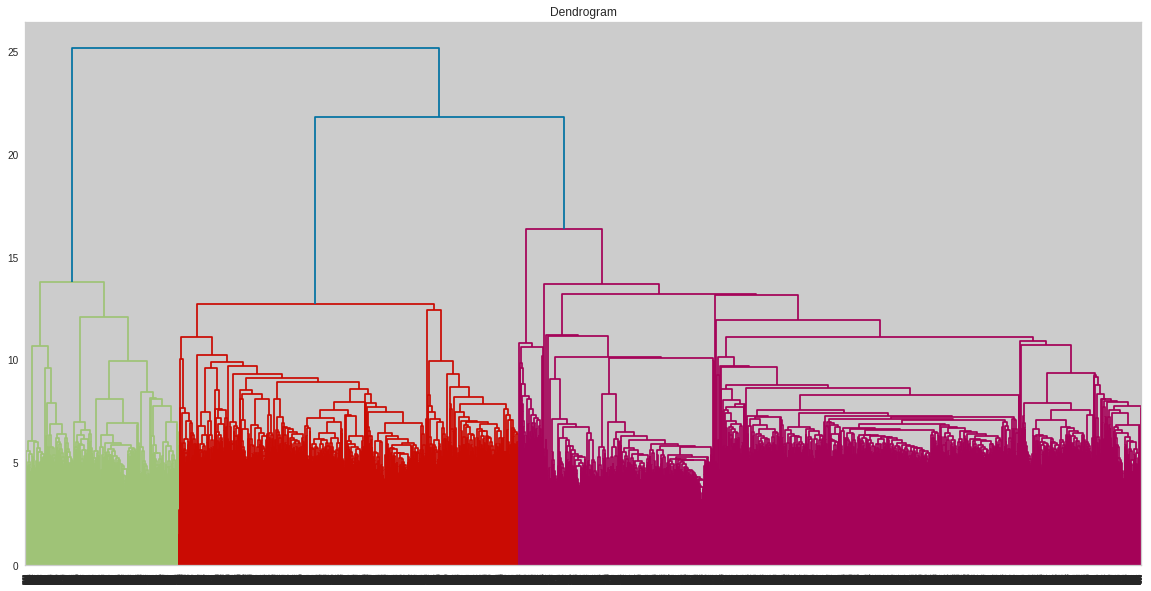

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20,10)) # set the dendogram size 
plt.title("Dendrogram") # set the tile of the plot
clusters = shc.linkage(final_pca, method='ward', metric="euclidean") # hierarchial linkage on data set  
shc.dendrogram(Z=clusters) # dendogram
plt.show() # show the plot

<B> In this dendogram graph we see that there are 3 colors of line well shown. So. we fit the model for 3 clusters 

<b> Agglomeartive Clustering

<b> Agglomerative is a bottom-up approach, in which the algorithm starts with taking all data points as single clusters and merging them until one cluster is left.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward') # set the agglomerative clustering model 
clustering_model.fit(final_pca) # fit the model on data set
hch_predict =  clustering_model.fit_predict(final_pca) # predict the model on data set 
hch_label = clustering_model.labels_ # store the cluster level 

In [ ]:
# 3d visualization for 3 cluster 
trace = go.Scatter3d(x=final_pca[:, 0], y=final_pca[:, 1], z=final_pca[:, 2], mode='markers',marker=dict(color = hch_label, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
# plt.figure(figsize=(20 , 10))
# plt.title('description and listed_in')
# plt.scatter(final_pca[:, 0], final_pca[:, 1], c=hch_label, s=20, cmap='spring')
# centers = centers
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20, alpha=0.5)

<b> Evaluation Metrics 

In [ ]:
# loading the dataset
X, y_true = make_blobs(n_samples=5000, centers=5,cluster_std=0.50, random_state=42)
# hierrachial
hch_clust = AgglomerativeClustering(n_clusters=5).fit(X)
# we store the cluster labels
labels = hch_clust.labels_

In [ ]:
print("Rand Index = ", metrics.rand_score(y, hch_predict))
print("Adjusted Rand Score = ", metrics.adjusted_rand_score(y, hch_predict))
print("Fowless Mallows Score = ", metrics.fowlkes_mallows_score(y, hch_predict))
print("Callinski Harabasz Score ", metrics.calinski_harabasz_score(X, labels))
print("Davies Bouldin Score = ", metrics.davies_bouldin_score(X, labels))
score = silhouette_score(X, labels)
print("Silhouette score = {}".format(score))
purity = purity_score(y, hch_predict)
print(f"The purity score = {round(purity*100, 2)}%")

Rand Index =  0.5904761804229494
Adjusted Rand Score =  0.1884459096007609
Fowless Mallows Score =  0.5565080097070684
Callinski Harabasz Score  142111.02707726092
Davies Bouldin Score =  0.24085459530577152
Silhouette score = 0.8280219037788982
The purity score = 76.88%


<b> Valid CLustering

<b> Cluster validity consists of a set of techniques for finding a set of clusters that best fits natural partitions (of given datasets) without any a priori class information. The outcome of the clustering process is validated by a cluster validity index.

In [ ]:
pip install validclust

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.datasets import make_blobs
from validclust import ValidClust
data, _ = make_blobs(n_samples=5000, centers=4, n_features=7, random_state=42)
vclust = ValidClust(
    k=list(range(2, 11)), 
    methods=['hierarchical', 'kmeans']
)
cvi_vals = vclust.fit_predict(data)
print(cvi_vals)


                                  2             3             4   \
method       index                                                 
hierarchical silhouette     0.590596      0.785243      0.716000   
             calinski    5584.469680  30223.291044  45867.407833   
             davies         0.557999      0.321115      0.425457   
             dunn           0.622027      1.029994      0.282047   
kmeans       silhouette     0.590596      0.785243      0.716000   
             calinski    5584.469680  30223.291044  45867.407833   
             davies         0.557999      0.321115      0.425457   
             dunn           0.622027      1.029994      0.282047   

                                   5             6             7   \
method       index                                                  
hierarchical silhouette      0.585445      0.390995      0.193270   
             calinski    34990.970941  28417.996798  24037.449110   
             davies          1.681674      

In [ ]:
type(cvi_vals)

pandas.core.frame.DataFrame

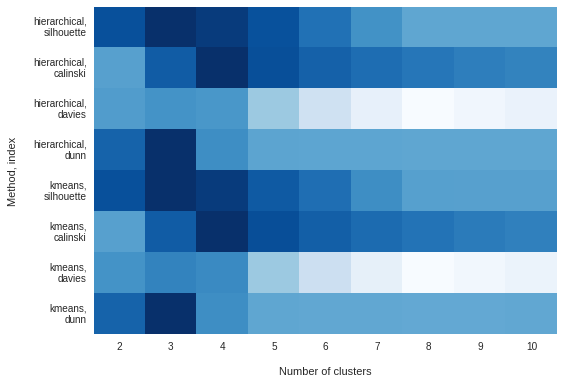

In [ ]:
vclust.plot()

<B> Here we see in the valid clsutering plot that the 3 clusters are more darker in both of two clustering algorithms. So, we fit the both model for 3 clusters and visualize it. 

In [ ]:
# here we get positive silhoutte score for 2 clusters .. so here we select n_cluster = 2
kmeans = KMeans(n_clusters=3,init = 'k-means++', random_state=42)
kmeans.fit(final_pca) # fit the data set 
y_kmeans = kmeans.predict(final_pca) # predict on data set 
y_kmeans

array([2, 0, 0, ..., 0, 2, 0], dtype=int32)

In [ ]:
# visualize cluster data for 2 cluster 
trace = go.Scatter3d(x=final_pca[:, 0], y=final_pca[:, 1], z=final_pca[:, 2], mode='markers',marker=dict(color = y_kmeans, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward') # set the agglomerative clustering model 
clustering_model.fit(final_pca) # fit the model on data set
hch_predict =  clustering_model.fit_predict(final_pca) # predict the model on data set 
hch_label = clustering_model.labels_ # store the cluster level 

In [ ]:
# 3d visualization for 5 cluster 
trace = go.Scatter3d(x=final_pca[:, 0], y=final_pca[:, 1], z=final_pca[:, 2], mode='markers',marker=dict(color = hch_label, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

<B> By the visualization we see that the clusters are not well separated. So, we can conclude that, if we clustering without any prior information, the clustering is not that so much not good.

# <center><b> DBSCAN

<b>Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a base algorithm for density-based clustering. It can discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers. Based on a set of points DBSCAN groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points.

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=20) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(final_pca) # fitting the data to the object
distances,indices=nbrs.kneighbors(final_pca) # finding the nearest neighbours

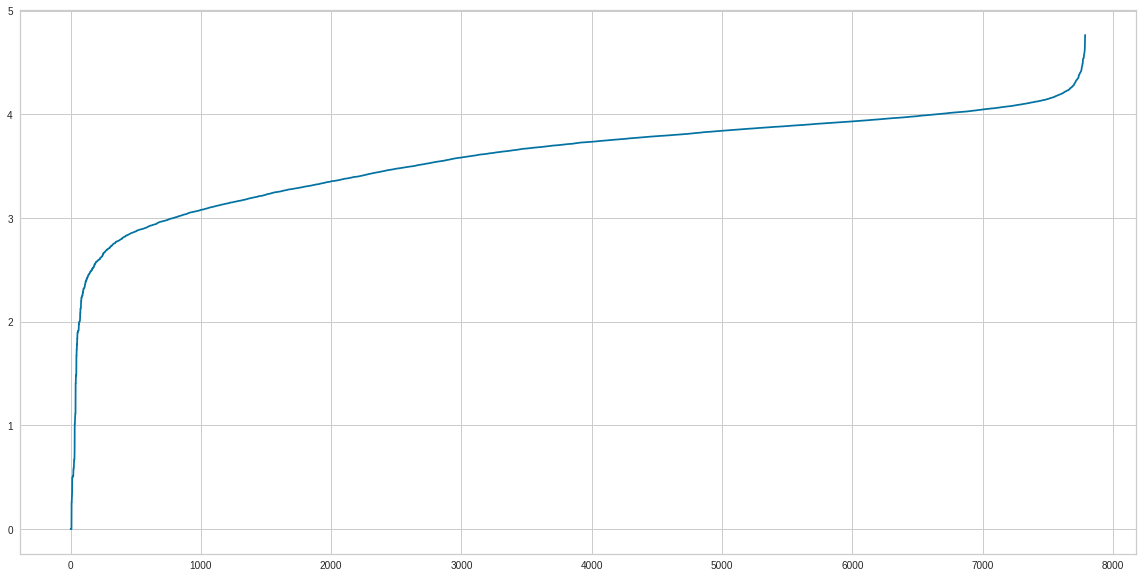

In [ ]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (20,10) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

<B> Here maximum curvature followed in around 2.5, that's why select epsilon = 2.5

In [ ]:
# cluster the data into five clusters
dbscan = DBSCAN(eps = 2.5, min_samples = 5000).fit(final_pca) # fitting the model
labels = dbscan.labels_ # getting the labels

In [ ]:
# visualization
trace = go.Scatter3d(x=final_pca[:, 0], y=final_pca[:, 1], z=final_pca[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
dbscan = DBSCAN().fit(final_pca)
dbscan_predict =  dbscan.fit_predict(final_pca)
dbscan_label = dbscan.labels_

In [ ]:
# loading the dataset
X, y_true = make_blobs(n_samples=5000, centers=4, cluster_std=0.50, random_state=42)
# DBSCAN
dbscan_clust = DBSCAN().fit(X)
# we store the cluster labels
labels = dbscan_clust.labels_

NameError: ignored

<b> Evaluation Metrics

In [ ]:
print("Rand Index = ", metrics.rand_score(y, dbscan_predict))
print("Adjusted Rand Score = ", metrics.adjusted_rand_score(y, dbscan_predict))
print("Fowless Mallows Score = ", metrics.fowlkes_mallows_score(y, dbscan_predict))
print("Calinski Harabasz Score = ", metrics.calinski_harabasz_score(X, labels))
print("Davies Bouldin Score = ", metrics.davies_bouldin_score(X, labels))
score = silhouette_score(X, labels)
print("Silhouette score = {}".format(score))
purity = purity_score(y, dbscan_predict)
print(f"The purity score = {round(purity*100, 2)}%")

# <center><b> Recommendation

<b> Cosine similarity in the recommendation system is used with the same principle of cosine angles, where even if the similarity of the content is less similar it would be considered as the least recommended content, and for higher similarity of contents, the recommendations generated would be at the top.

In [ ]:
# defining a new df for building a recommender system
recommend_data = Netflix.copy()

In [ ]:
# Changing the index of the df from show id to show title
recommend_data['show_id'] = recommend_data.index

In [ ]:
# converting tokens to string
def convert(lst):
  return ' '.join(lst)
recommend_data['Clustering'] = Netflix_FE['Clustering'].apply(lambda x: convert(x))

In [ ]:
# setting title of movies/Tv shows as index
recommend_data.set_index('title',inplace=True)

In [ ]:
# Count vectorizer
CV = CountVectorizer()
cv_matrix = CV.fit_transform(recommend_data['Clustering'])

In [ ]:
# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity = cosine_similarity(cv_matrix)

In [ ]:
cosine_similarity.shape

(7787, 7787)

In [ ]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(recommend_data.index)

def Recommendation(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = [] # create a blank list to store recommendation movies  
    idx = indices[indices == title].index[0] # index
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index) # list of top 10 movies
    for i in top10:
      recommend_content.append(list(recommend_data.index)[i]) # append the movies in the list
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content # return the recommendation 

  except:
    return 'Invalid Entry' # else show the invalid entry

In [ ]:
# Recommendations for 'Special 26'
Recommendation('Special 26')

If you liked 'Special 26', you may also enjoy:



['Interrogation',
 'Saheb Biwi Aur Gangster Returns',
 'Hisss',
 'Ghanchakkar',
 'Aiyaary',
 'Satyagraha',
 'Super Nani',
 'Dark Chocolate (Bengali Version)',
 'A Wednesday',
 'Pizza']

In [ ]:
# Recommendations for 'Stranger Things'
Recommendation('Stranger Things')

If you liked 'Stranger Things', you may also enjoy:



['Beyond Stranger Things',
 'Zombie Dumb',
 'Haunted',
 'Kiss Me First',
 'Mighty Little Bheem',
 'Anjaan: Special Crimes Unit',
 'Sleepless Society: Nyctophobia',
 'Scream',
 'Fear Files... Har Mod Pe Darr',
 'Anjaan: Rural Myths']

In [ ]:
# Recommendations for '3 Idiots'
Recommendation('3 Idiots')

If you liked '3 Idiots', you may also enjoy:



['PK',
 'Ek Main Aur Ekk Tu',
 'Darna Mana Hai',
 'Dil Chahta Hai',
 'No Entry',
 'Rang De Basanti',
 'Trimurti',
 'Amar Akbar & Tony',
 'Don',
 'War Chhod Na Yaar']

In [ ]:
# Recommendations for '1920'
Recommendation('1920')

If you liked '1920', you may also enjoy:



['Pizza',
 'Fida',
 'My Friend Pinto',
 'Luv Shuv Tey Chicken Khurana',
 'Coffee with D',
 'Lagaan',
 'John Day',
 'Inhuman Kiss',
 '#Alive',
 'Gour Hari Dastaan: The Freedom File']

In [ ]:
# Recommendations for 'Don'
Recommendation('Don')

If you liked 'Don', you may also enjoy:



['Don 2',
 'Deewana Main Deewana',
 'Ek Main Aur Ekk Tu',
 'Pukar',
 'Drive',
 'Happy New Year',
 'Lakshya',
 'Namak Halaal',
 'Asoka',
 'Alibaba Aur 40 Chor']

# <B> <Center>Conclusion

<B> Conclusions : 
1. There are two types of contents present in Netflix - (i) Movie and (ii) Tv Shows
2. Maximum number of contents released in the year 2018 followed by the year 2017.
3. Most of the contents released in the month December. End of the year or beginning of a year is the most choosen month by any director. 
4. Maximum number of contents are TV-MA, i.e. Adult type of contents. 
5. Highest contents provided country is United Kingdom. India is second most contents provided country.
6. Most provided content of United Kingdom and India is Dramas and Inetrnational Movies respectively.
7. Highest number of movies present in Netflix is International Movies genre.
8. Recently the genre type of "Stand Up Comedy" and "Children and Family Movies" are increased.
9. Top cast in Netflix is "Anupam Kher" (He is a Indian Actor).
10. Top most director in Netflix is " Raul Campos, Jan Suter".(David Dhawan is the Indian Top most director)
11. Runtime for movies is around 85 to 95 minutes.
12. By LDA we get that the top 5 words presents in description are - 'tv', 'international', 'shows', 'movies' and 'family'.
13. Silhoutte score for K means clusterring and hierarchial clustering is 0.91 and 0.82 respectively.
14. Purity score for K means clusterring and hierarchial clustering is 68.32% and 76.88% respectively.
15. K means clustering is the best clusttering model on the basis od silhoutte score. 
16. By applying different clustering algorithms to our dataset .we get the optimal number of cluster is equal to 3